# Uncovering Trends in Netflix Content: What's Hot and What's Not
#### By *Saurabh Kudesia* | May 2025
[GitHub](https://github.com/saurabh-kudesia) | [Kaggle](https://www.kaggle.com/saurabhkudesia) | [LinkedIn](https://www.linkedin.com/in/saurabhkudesia/)

---
© 2025 Saurabh Kudesia

*This project is licensed under the [MIT License](https://opensource.org/licenses/MIT). You are free to use, modify, and distribute this code, provided you include proper attribution and retain the license notice.* 

[![License: MIT](https://img.shields.io/badge/License-MIT-blue.svg)](https://opensource.org/licenses/MIT) 

<img src="https://images.unsplash.com/photo-1522869635100-9f4c5e86aa37?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="Netflix_cover" width="100%" style="margin-bottom: 10px;">

*Image Courtsey: [Unsplash.com](https://unsplash.com)*

# Introduction

## Context
[Netflix](http://netflix.com/), one of the world's largest streaming platforms, offers a vast catalog of movies and TV shows spanning genres, countries, and decades. As the entertainment industry becomes increasingly data-driven, it is valuable to analyze what content Netflix provides, how it has evolved over time, and what patterns exist across titles, formats, and regions.

This analysis aims to uncover trends, patterns, and insights in Netflix's content library based on publicly available metadata.

## Data Dictionary
This project utilizes a dataset sourced from
[Kaggle](https://www.kaggle.com/datasets/octopusteam/full-netflix-dataset), provided by [Octopusteam](https://www.kaggle.com/octopusteam). It contains detailed metadata about Netflix's content:


## Goals
The primary goal of this analysis is to explore and uncover insights from Netflix's content catalog using structured exploratory data analysis. Specifically, we aim to:

- Understand the composition and evolution of Netflix's catalog  
- Identify dominant patterns across countries and genres  
- Examine trends over time in content type  
- Investigate content diversity across regions and years    

## Key Themes
The analysis is structured around the following key themes:

- **Catalog Composition:** Is Netflix leaning more toward Movies or TV Shows?  
- **Geographic Trends:** Which countries dominate the catalog, and how diverse is the content?  
- **Temporal Analysis:** How has content volume and type evolved over time?  
- **Duration Trends:** What is the typical length of Netflix content?

> ⚠️ **Warning**
>
> Since the [original dataset](https://www.kaggle.com/datasets/octopusteam/full-netflix-dataset) is regularly updated, some analyses may not reflect the most current data. All results in this notebook are based on the dataset snapshot from May 30, 2025. For learning purposes, you can download the exact dataset used in these analyses [here](https://www.kaggle.com/datasets/octopusteam/full-netflix-dataset).

> 🔧🚧 **Heads-up: This Code Is a Work in Progress**
>
> I'm continuously improving and refining the code as time allows, but there’s no fixed schedule for updates or new features.

# Import Libraries, Modules, and Data

**Install Packages**

In [1]:
!pip install pycountry-convert -q -q -q --no-input
!pip install ydata-profiling -q -q -q --no-input
print('\n ✅ All required packages installed successfully')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 52.8 MB/s eta 0:00:00

 ✅ All required packages installed successfully


**Import Libraries and Modules**

In [2]:
# Data manipulation libraries
import pandas as pd
import numpy as np
import re
from collections import Counter

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing libraries
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

# Country and region related libraries
import pycountry
import pycountry_convert as pc

# Profiling tools
from ydata_profiling import ProfileReport

# Interactive widgets for Jupyter notebooks
import ipywidgets as widgets
from IPython.display import display

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set Seaborn color palette (for categorical plots like boxplots, scatter plots, etc.)
sns.set_palette('muted')

# Set Matplotlib color cycle (for plots like bar charts, line plots, etc.)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['skyblue', 'lightcoral', 'mediumseagreen', 'orange'])


print('\n ✅ All required libraries imported successfully')


 ✅ All required libraries imported successfully


In [3]:
# Check package version
print('===Package version used in this notebook===')
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Pycountry_convert version:", pc.__version__)
print("Ydata_profiling version:", ProfileReport.__module__.split('.')[0])
print("Seaborn version:", sns.__version__)

===Package version used in this notebook===
Pandas version: 2.2.3
Numpy version: 1.26.4
Matplotlib version: 3.7.2
Pycountry_convert version: 0.7.2
Ydata_profiling version: ydata_profiling
Seaborn version: 0.12.2


**Define Global Helper Functions**

In [4]:
# Helper function to annotate bars
def annotate_bars(ax, fmt='both', fontsize=10, spacing=2):
    total = sum([bar.get_height() for bar in ax.patches])
    for bar in ax.patches:
        height = bar.get_height()
        if fmt == 'count':
            label = f'{int(height)}'
        elif fmt == 'percent':
            label = f'{(height / total) * 100:.1f}%'
        elif fmt == 'both':
            label = f'{int(height)} ({(height / total) * 100:.1f}%)'
        else:
            label = ''
        ax.annotate(label,
                    (bar.get_x() + bar.get_width() / 2, height + spacing),
                    ha='center', va='bottom', fontsize=fontsize)

**Load Data**

In [5]:
df = pd.read_csv('/kaggle/input/netflix-dataset-baseline/netflix-data-baseline.csv')

# Preliminary Data Review

## Check Dataset size (Rows/Columns)

In [6]:
print (f' The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

 The dataset has 21816 rows and 8 columns


## Peek at the First/Last Rows

In [7]:
# Check first five rows
df.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,9185.0,NaN
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,tt0092149,7.4,8015.0,NaN
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2380426.0,NaN
3,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1249289.0,NaN
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,527464.0,NaN


In [8]:
# Check last five rows
df.tail()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
21811,NaN,tv,NaN,2009.0,NaN,NaN,NaN,NaN
21812,Cheat: Unfinished Business,tv,Reality-TV,2025.0,tt32249973,4.9,184.0,NaN
21813,NaN,tv,"Animation, Crime, Mystery",1996.0,NaN,NaN,NaN,NaN
21814,NaN,tv,NaN,2014.0,NaN,NaN,NaN,NaN
21815,Entrapped,tv,"Crime, Drama, Mystery",2022.0,tt21964626,7.0,4001.0,NaN


## Check Non-Null Counts, Data Types, Memory Usage

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21816 entries, 0 to 21815
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               21085 non-null  object 
 1   type                21816 non-null  object 
 2   genres              21444 non-null  object 
 3   releaseYear         21776 non-null  float64
 4   imdbId              20169 non-null  object 
 5   imdbAverageRating   19986 non-null  float64
 6   imdbNumVotes        19986 non-null  float64
 7   availableCountries  158 non-null    object 
dtypes: float64(3), object(5)
memory usage: 1.3+ MB


## Summary Stats for All Columns

In [10]:
df.describe(include='all')

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
count,21085,21816,21444,21776.000000,20169,19986.000000,1.998600e+04,158
unique,20228,2,881,NaN,20164,NaN,NaN,98
top,The Courier,movie,Comedy,NaN,tt30970892,NaN,NaN,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
freq,5,16475,1824,NaN,2,NaN,NaN,11
mean,NaN,NaN,NaN,2013.358973,NaN,6.400010,3.225773e+04,NaN
std,NaN,NaN,NaN,14.310795,NaN,1.092707,1.219338e+05,NaN
min,NaN,NaN,NaN,1913.000000,NaN,1.000000,5.000000e+00,NaN
25%,NaN,NaN,NaN,2011.000000,NaN,5.700000,3.300000e+02,NaN
50%,NaN,NaN,NaN,2018.000000,NaN,6.500000,1.615000e+03,NaN
75%,NaN,NaN,NaN,2022.000000,NaN,7.200000,1.040950e+04,NaN


## Check for Missing Values

In [11]:
# Total rows in the DataFrame
total_rows = len(df)

# Calculate missing count and percentage
missing_report = df.isnull().sum().to_frame(name='Missing Count')
missing_report['Missing %'] = (missing_report['Missing Count'] / total_rows * 100).round(2)

# Show the report
print("\n===Missing values summary===\n")
print(missing_report)


===Missing values summary===

                    Missing Count  Missing %
title                         731       3.35
type                            0       0.00
genres                        372       1.71
releaseYear                    40       0.18
imdbId                       1647       7.55
imdbAverageRating            1830       8.39
imdbNumVotes                 1830       8.39
availableCountries          21658      99.28


## Check for Duplicate Entries

In [12]:
# Find duplicate rows (all columns must match)
duplicate_rows = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Show original as well as the duplicate rows
duplicate_rows

Number of duplicate rows: 407


,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
16415,Kevin Hart: The Kennedy Center Mark Twain Priz...,movie,Comedy,2024.0,tt31805297,6.6,815.0,NaN
16444,One Piece Fan Letter,movie,"Action, Adventure, Animation",2024.0,tt33998607,9.2,19914.0,NaN
16908,NaN,tv,NaN,2008.0,NaN,NaN,NaN,NaN
17090,NaN,tv,NaN,2024.0,NaN,NaN,NaN,NaN
17184,NaN,tv,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
21806,NaN,tv,Reality,2025.0,NaN,NaN,NaN,NaN
21807,NaN,tv,NaN,2023.0,NaN,NaN,NaN,NaN
21810,NaN,tv,NaN,2015.0,NaN,NaN,NaN,NaN
21811,NaN,tv,NaN,2009.0,NaN,NaN,NaN,NaN


> 📝 **Observations**
>
> - **Dataset Overview:** The dataset comprises 21,816 rows and 8 columns, primarily centered around media titles. It includes a mix of textual (`title`, `type`, `genres`), numerical (`releaseYear`, `imdbAverageRating`, `imdbNumVotes`), identifier (`imdbId`), and list-type (`availableCountries`) columns.
> - **Data Quality:** A significant portion of data is missing in key columns: `availableCountries` is 99.28% missing, while `imdbAverageRating` and `imdbNumVotes` have \~8.4% missing values. There is also moderate missingness in `imdbId`, `title`, and `genres`. Additionally, there are 20,228 unique titles, indicating some duplication, and one duplicate `imdbId`.
> - **Content Characteristics:** Movies dominate the dataset with 16,475 entries, and Comedy is the most frequent genre with 1,824 entries. The title "Shadow" is the most frequently occurring, appearing five times.
> - **Temporal Distribution:** The `releaseYear` spans from 1913 to 2025, with a median release year of 2018, suggesting a bias toward recent content.
> - **IMDb Metrics:**  The average IMDb rating is approximately 6.4, with values ranging from 1.0 to 9.8. The number of IMDb votes averages around 32,000, ranging from just 5 votes to over 3 million, indicating a wide spread in viewer engagement.

> 🛑 **Data Challenges**
> - `availableCountries` is nearly empty (**99.28% missing**), making it unsuitable for analysis without augmentation.
> - High missing values in `imdbAverageRating`, `imdbNumVotes`, and `imdbId` may **limit insights** and require imputation or filtering.
> - Presence of duplicate title entries may skew statistics and should be cleaned.
> - `genres` and `availableCountries` are stored as comma-separated strings, which complicates querying and grouping.
> - Repeated values in `title` and `imdbId` threaten data integrity and suggest the need for deduplication logic.

---

>💡 **Tip**
>
> - Check and correct data types, especially for numeric and list-based fields.
> - Impute or flag missing values in IMDb metrics using statistical or rule-based methods.
> - Normalize multi-value fields (e.g., `genres`, `availableCountries`) by splitting into lists or separate rows.
> - Investigate duplicate records to identify true redundancies vs. intentional multi-release entries.
> - Use other metadata fields to recover missing `title` or `imdbId` before dropping.

## Distribution of Categorical Values

In [13]:
cat_columns = ['type', 'genres', 'availableCountries']

for col in cat_columns:
    print(f"===Value Counts for '{col}'===\n")
    print(df[col].value_counts(dropna=False))
    print("\n" + "-"*40 + "\n")

===Value Counts for 'type'===

type
movie    16475
tv        5341
Name: count, dtype: int64

----------------------------------------

===Value Counts for 'genres'===

genres
Comedy                                                 1824
Drama                                                  1754
Documentary                                            1026
Comedy, Drama                                           839
Drama, Romance                                          714
                                                       ... 
Musical, Thriller                                         1
Horror, Short, Thriller                                   1
Comedy, Family, Music                                     1
Action, Biography, Comedy                                 1
Action & Adventure, Sci-Fi & Fantasy, Drama, Comedy       1
Name: count, Length: 882, dtype: int64

----------------------------------------

===Value Counts for 'availableCountries'===

availableCountries
NaN                

> 📝 **Observations**
>
> - **Content Type Distribution:** The platform primarily features movies, with 16,475 entries (≈75%), while TV shows make up the remaining 5,341 entries (≈25%).  
> - **Genre Diversity and Popularity:** There are 882 unique genre combinations, reflecting a high level of diversity. The most common single genres are Comedy (1,824 titles), Drama (1,754), and Documentary (1,026). Popular genre mixes include "Comedy, Drama" (839) and "Drama, Romance" (714). Some combinations are extremely rare (appearing only once), such as "Comedy, Game-Show, Horror". Overall, while Comedy and Drama dominate, the presence of niche combinations suggests content tailored to a variety of audience tastes.
> - **Geographic Availability:** A vast majority of entries (21,658 out of 21,816) lack data on `availableCountries`, with only 158 entries providing this information. The most frequent availability group (11 entries) lists a broad range of countries, while others are limited to specific regions (e.g., "TZ" or "ID" alone). This scarcity of geographic data limits regional analysis and likely reflects gaps in metadata or licensing restrictions.

> 💡**Tip**
>
> The uneven distribution of `availableCountries` and the large number of rare genres suggest opportunities for data refinement:
>
> - **Genre normalization:** The dataset would benefit from splitting multi-genre entries into individual genres, either as separate rows or as structured lists, to enable more accurate filtering and analysis.
> - **Geographic data enhancement:** The significant lack of availableCountries data limits regional analysis. This issue may require further investigation or enrichment from external sources to improve coverage and insight.

## Analyze Patterns in Missing Countries Data
21658 missing values in the `availableCountries` column is quite significant! We need to understand if the missingness is random or systematic. Let's check if missing countries correspond mostly to certain types of titles (e.g., TV Shows vs Movies), release years, or other columns. This might help understand why the data is missing.

In [14]:
# Locate titles with missing release year
missing_release_years = df[df['releaseYear'].isna()][['title']].drop_duplicates()
print(missing_release_years)

                                 title
12661  Rudra: Secret of the Black Moon
16302       aiko Love Like Aloha vol.7
16698                              NaN
20685     3-nen Z-gumi Ginpachi Sensei


> 📝**Observations**
>
> Many rows—especially TV shows—are missing critical information such as titles, genres, release years, IMDb ratings, and country availability. Missing availableCountries data is mainly found in movies (16,376 missing) but also affects TV shows (5,282 missing). Additionally, a large portion of these entries lack related fields like `imdbAverageRating`, `imdbNumVotes`, and even `title`, indicating they likely originate from incomplete or less detailed sources. This makes it difficult to analyze or rely on these records.

> 💡**Tip**
>
> The missing data is likely systematic—arising from gaps in source data rather than random issues. Dropping all 21,658 rows with missing country data would cause substantial data loss and potential bias. Also, imputing countries is not reliable without external information or business rules.
>
> For our analysis, retaining missing availableCountries values as NaN is appropriate, as it avoids introducing assumptions and preserves data integrity. We will continue to monitor and evaluate entries missing multiple critical fields—such as title, genres, and IMDb-related data—as potential candidates for exclusion or further validation, depending on the specific analysis objectives.

## Check Unique Countries

In [15]:
df['availableCountries'].value_counts()

availableCountries
AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE, BG, BH, BM, BO, BR, BS, BY, BZ, CA, CH, CI, CL, CM, CO, CR, CU, CV, CY, CZ, DE, DK, DO, DZ, EC, EE, EG, ES, FI, FJ, FR, GB, GF, GG, GH, GI, GQ, GR, GT, HK, HN, HR, HU, ID, IE, IL, IN, IQ, IS, IT, JM, JO, JP, KE, KR, KW, LB, LC, LI, LT, LU, LV, LY, MA, MC, MD, ME, MG, MK, ML, MT, MU, MX, MY, MZ, NE, NG, NI, NL, NO, NZ, OM, PA, PE, PF, PH, PK, PL, PS, PT, PY, QA, RO, RS, SA, SC, SE, SG, SI, SK, SM, SN, SV, TC, TH, TN, TR, TT, TW, TZ, UA, UG, US, UY, VE, YE, ZA, ZM, ZW    11
TZ                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

> 📝 **Observations**
>
> There's a trend of multi-country availability, with many titles listed as available in 11 or more countries, often spanning multiple continents. This suggests a deliberate strategy for broader international reach across streaming platforms. 
> At the same time, single-country exclusivity is also present. Countries like Tanzania (TZ) and Indonesia (ID) have several titles that appear to be available only within their borders, highlighting localized content distribution or licensing. 
> There are notable regional availability clusters, such as Southeast Asia (`ID, MY, PH, SG, TH`) and Central Europe (`AT, CH, DE, LI`), indicating regional licensing patterns or shared audience preferences.
> A few titles exhibit broad international distribution, especially across Asian markets (e.g., `HK, ID, IN, JP, MY, PH, PK, SG, TH, TW`). However, such extensive country coverage is rare, with long multi-country entries being infrequent and typically unique to a single title.


> 💡**Tip**
>
> This data variety underscores the importance of splitting multi-country entries into individual rows to enable accurate country-level analysis and avoid miscounting availability.

# Data Cleaning

>💡 **Tip**
>
> To enrich and complete missing movie metadata in our dataset, we will leverage following files fro the [IMDb Bulk Dataset](https://datasets.imdbws.com) — a comprehensive and authoritative source for film and TV information. IMDb provides a freely available, regularly updated data for research.
>
> | File Name              | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| `title.basics.tsv`  | Includes `tconst` (IMDb ID), `titleType`, `primaryTitle`, `startYear`, `genres` |
| `title.ratings.tsv` | Contains `tconst`, `averageRating`, `numVotes`                              |
| `title.akas.tsv`    | Alternate titles by region or language                         |
>
> Each title in these files has a unique identifier (`tconst` or `titleId`), which we will use as a key to fill in missing data or enrich our DataFrame with additional information.

## Load Data from Internet Movie Database (IMDb)

In [16]:
# Load title basics data into a DataFrame
# This file contains information such as movie titles, release years, genres, etc.
basics = pd.read_csv(
    '/kaggle/input/netflix-dataset-baseline/title.basics.tsv',
    sep='\t',
    na_values='\\N',
    encoding='utf-8',
    low_memory=False
)

# Load the IMDb ratings data into a DataFrame
# This file contains average user ratings and number of votes for each title
ratings = pd.read_csv('/kaggle/input/netflix-dataset-baseline/title.ratings.tsv', sep='\t', na_values='\\N')

> 💡**Tip**
>
> Since `Title.akas.tsv.gz` is larger than 1 GB, we will download only the data relevant to our dataset to reduce processing time and storage usage.

In [17]:
# Load the IMDb title.akas data in chunks to handle large file size efficiently
# This file contains alternate titles for movies in different regions and languages
akas_chunks = pd.read_csv(
    '/kaggle/input/netflix-dataset-baseline/title.akas.tsv',
    sep='\t',
    na_values='\\N',
    encoding='utf-8',
    chunksize=100_000,
    low_memory=False
)

# Prepare to collect filtered data chunks
akas_filtered_list = []

# Create a set of IMDb IDs from the existing dataset to filter relevant rows
imdb_ids = set(df['imdbId'].dropna().unique())

# Iterate over each chunk and filter rows where 'titleId' matches one of our IMDb IDs
for chunk in akas_chunks:
    filtered_chunk = chunk[chunk['titleId'].isin(imdb_ids)]
    akas_filtered_list.append(filtered_chunk)

# Combine all filtered chunks into a single DataFrame
akas = pd.concat(akas_filtered_list, ignore_index=True)

## Analyze Downloaded Data from IMDb  

In [18]:
# Check the IMDb title basics DataFrame
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681117 entries, 0 to 11681116
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       float64
 6   endYear         float64
 7   runtimeMinutes  object 
 8   genres          object 
dtypes: float64(3), object(6)
memory usage: 802.1+ MB


In [19]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1,Short


In [20]:
# Check the IMDb title ratings DataFrame
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571786 entries, 0 to 1571785
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1571786 non-null  object 
 1   averageRating  1571786 non-null  float64
 2   numVotes       1571786 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 36.0+ MB


In [21]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2159
1,tt0000002,5.5,294
2,tt0000003,6.5,2205
3,tt0000004,5.3,188
4,tt0000005,6.2,2945


In [22]:
# Check the IMDb title.akas Dataframe
akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445587 entries, 0 to 445586
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   titleId          445587 non-null  object
 1   ordering         445587 non-null  int64 
 2   title            445587 non-null  object
 3   region           423020 non-null  object
 4   language         139639 non-null  object
 5   types            413330 non-null  object
 6   attributes       15727 non-null   object
 7   isOriginalTitle  445587 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 27.2+ MB


In [23]:
akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0003014,1,Ingeborg Holm,NaN,NaN,original,NaN,1
1,tt0003014,10,Ingeborg Holm oder Gieb uns unser täglich Brot,AT,NaN,imdbDisplay,NaN,0
2,tt0003014,11,Margaret Day,GB,NaN,imdbDisplay,NaN,0
3,tt0003014,12,Unser täglich Brot,DE,NaN,alternative,NaN,0
4,tt0003014,13,Ингеборг Хольм,RU,NaN,imdbDisplay,NaN,0


## Integrate and Enrich DataFrame with IMDb Metadata

In [24]:
# Rename columns from the supporting data before integrating them with our DataFrame
basics.rename(columns={'tconst': 'imdbId'}, inplace=True)
ratings.rename(columns={'tconst': 'imdbId'}, inplace=True)
akas.rename(columns={'titleId': 'imdbId', 'region': 'availableCountries_imdb'}, inplace=True)

# Show missing values before integration
print("\n===Current Missing Values===\n")
print(df.isnull().sum())

# Clean imdbId columns
df = df.dropna(subset=['imdbId']).copy()
df['imdbId'] = df['imdbId'].astype(str).str.strip()
basics['imdbId'] = basics['imdbId'].astype(str).str.strip()
ratings['imdbId'] = ratings['imdbId'].astype(str).str.strip()
akas['imdbId'] = akas['imdbId'].astype(str).str.strip()

# Merge IMDb data
df_merged = df.merge(
    basics[['imdbId', 'primaryTitle', 'titleType', 'genres', 'startYear', 'isAdult', 'runtimeMinutes']],
    on='imdbId', how='left', suffixes=('_original', '_imdb')
)

df_merged = df_merged.merge(
    ratings[['imdbId', 'averageRating', 'numVotes']],
    on='imdbId', how='left'
)

akas_dedup = akas[['imdbId', 'availableCountries_imdb', 'isOriginalTitle']]
df_merged = df_merged.merge(akas_dedup, on='imdbId', how='left')

# Fill missing values
df_merged['title'] = df_merged['title'].fillna(df_merged['primaryTitle'])
df_merged['type'] = df_merged['type'].fillna(df_merged['titleType'])
df_merged['genres_original'] = df_merged['genres_original'].fillna(df_merged['genres_imdb'])
df_merged['releaseYear'] = df_merged['releaseYear'].fillna(df_merged['startYear'])
df_merged['imdbAverageRating'] = df_merged['imdbAverageRating'].fillna(df_merged['averageRating'])
df_merged['imdbNumVotes'] = df_merged['imdbNumVotes'].fillna(df_merged['numVotes'])
df_merged['availableCountries'] = df_merged['availableCountries'].fillna(df_merged['availableCountries_imdb'])

# Finalize output
original_columns = df.columns.tolist()
column_mapping = {
    'title': 'title',
    'type': 'type',
    'genres': 'genres_original',
    'releaseYear': 'releaseYear',
    'imdbId': 'imdbId',
    'imdbAverageRating': 'imdbAverageRating',
    'imdbNumVotes': 'imdbNumVotes',
    'availableCountries': 'availableCountries'
}

# Add new fields explicitly
df_cleaned = df_merged[
    [col for col in original_columns if col in df_merged.columns] +
    ['isAdult', 'runtimeMinutes', 'genres_original']
].copy()

df_cleaned.rename(columns={'genres_original': 'genres'}, inplace=True)

# Show missing values after filling
print("\n===Missing Values Post Fix===\n")
print(df_cleaned.isnull().sum())


===Current Missing Values===

title                   731
type                      0
genres                  372
releaseYear              40
imdbId                 1647
imdbAverageRating      1830
imdbNumVotes           1830
availableCountries    21658
dtype: int64

===Missing Values Post Fix===

title                     0
type                      0
releaseYear               3
imdbId                    0
imdbAverageRating       523
imdbNumVotes            523
availableCountries    22502
isAdult                  11
runtimeMinutes        16320
genres                    5
dtype: int64


> ✅ **Resolution**
>
> We've added new columns (`isAdult` and `runtimeMinutes`) and significantly reduced the number of missing values for other columns. However, some columns — `imdbAverageRating`, `imdbNumVotes`, and `availableCountries` — still contain missing/duplicate data. Let's investigate these remaining gaps and resolve them.

## Handle Redundant Rows
We will remove redundant rows from the dataset where the only difference between duplicates is the `availableCountries` field being null.

> 💡**Tip**
>
> To ensure the dataset retains only the most complete and informative version of each record:
>1. Detect duplicates based on all columns except `availableCountries`.
2. From the duplicates, isolate rows with non-null `availableCountries` as valid.
3. Generate unique keys (a tuple of values), excluding `availableCountries` to identify each duplicate group.
4. Mark rows with null `availableCountries` if a valid duplicate exists for the same key.
5. Remove redundant entries (flagged rows), keeping only the versions with valid region data.
6. Print sample rows before and after to confirm the cleanup as expected.

**Handle Duplicate Titles Differing Only by Missing `availableCountries`**

In [25]:
# Define columns to check for duplicates (excluding 'availableCountries')
cols_except_country = [col for col in df_cleaned.columns if col != 'availableCountries']

# Identify all rows that have duplicates based on all columns except 'availableCountries'
dup_groups = df_cleaned[df_cleaned.duplicated(subset=cols_except_country, keep=False)]

# Find rows with non-null 'availableCountries'
groups_with_country = dup_groups[dup_groups['availableCountries'].notna()]

# Create a key function to identify duplicate groups
def key_func(row):
    return tuple(row[col] for col in cols_except_country)

# Get all group keys that have at least one non-null 'availableCountries'
valid_keys = set(key_func(row) for _, row in groups_with_country.iterrows())

# Identify rows to be removed
to_remove_mask = (df_cleaned['availableCountries'].isna()) & \
                 (df_cleaned.apply(key_func, axis=1).isin(valid_keys))

# Show sample rows before removing duplicates
example_before = df_cleaned[to_remove_mask].head()
print("\n===Sample Rows with Duplicate Countries===\n")
print(example_before)

# Count and Remove flagged rows
num_rows_to_remove = to_remove_mask.sum()
print(f"\n Removing {num_rows_to_remove} rows with NaN in 'availableCountries' that have duplicate entries with region info.")
df_cleaned = df_cleaned[~to_remove_mask].reset_index(drop=True)

# Show sample after removing duplicates
example_key = key_func(example_before.iloc[0])
example_after = df_cleaned[df_cleaned.apply(key_func, axis=1) == example_key]

print("\n===Sample Rows without Duplicate Countries===\n")
example_after


===Sample Rows with Duplicate Countries===

                   title   type  releaseYear     imdbId  imdbAverageRating  \
0                  Ariel  movie       1988.0  tt0094675                7.4   
24   Shadows in Paradise  movie       1986.0  tt0092149                7.4   
54          Forrest Gump  movie       1994.0  tt0109830                8.8   
115      American Beauty  movie       1999.0  tt0169547                8.3   
181    The Fifth Element  movie       1997.0  tt0119116                7.6   

     imdbNumVotes availableCountries  isAdult runtimeMinutes  \
0          9185.0                NaN      0.0             72   
24         8015.0                NaN      0.0             74   
54      2380426.0                NaN      0.0            142   
115     1249289.0                NaN      0.0            122   
181      527464.0                NaN      0.0            126   

                        genres  
0       Comedy, Crime, Romance  
24        Comedy, Drama, Music  
54

,title,type,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries,isAdult,runtimeMinutes,genres
0,Ariel,movie,1988.0,tt0094675,7.4,9185.0,HU,0.0,72,"Comedy, Crime, Romance"
1,Ariel,movie,1988.0,tt0094675,7.4,9185.0,IT,0.0,72,"Comedy, Crime, Romance"
2,Ariel,movie,1988.0,tt0094675,7.4,9185.0,PT,0.0,72,"Comedy, Crime, Romance"
3,Ariel,movie,1988.0,tt0094675,7.4,9185.0,SE,0.0,72,"Comedy, Crime, Romance"
4,Ariel,movie,1988.0,tt0094675,7.4,9185.0,TR,0.0,72,"Comedy, Crime, Romance"
5,Ariel,movie,1988.0,tt0094675,7.4,9185.0,US,0.0,72,"Comedy, Crime, Romance"
6,Ariel,movie,1988.0,tt0094675,7.4,9185.0,UY,0.0,72,"Comedy, Crime, Romance"
7,Ariel,movie,1988.0,tt0094675,7.4,9185.0,XWG,0.0,72,"Comedy, Crime, Romance"
8,Ariel,movie,1988.0,tt0094675,7.4,9185.0,RU,0.0,72,"Comedy, Crime, Romance"
9,Ariel,movie,1988.0,tt0094675,7.4,9185.0,SUHH,0.0,72,"Comedy, Crime, Romance"


**Summary of Missing Value (post cleanup)**

In [26]:
# Total rows in the clean df
total_rows = len(df_cleaned)

# Calculate missing count and percentage
missing_report = df_cleaned.isnull().sum().to_frame(name='Missing Count')
missing_report['Missing %'] = (missing_report['Missing Count'] / total_rows * 100).round(2)

# Show the result
print("\n===Summary of Missing values===\n")
print(missing_report)


===Summary of Missing values===

                    Missing Count  Missing %
title                           0       0.00
type                            0       0.00
releaseYear                     2       0.00
imdbId                          0       0.00
imdbAverageRating             350       0.08
imdbNumVotes                  350       0.08
availableCountries            110       0.03
isAdult                        11       0.00
runtimeMinutes              14909       3.52
genres                          4       0.00


In [27]:
# The missing values is insignificant, we can drop them
print(f'Dataset post dropping missing values\n')
df_cleaned = df_cleaned.dropna()
print(df_cleaned.isna().sum())

Dataset post dropping missing values

title                 0
type                  0
releaseYear           0
imdbId                0
imdbAverageRating     0
imdbNumVotes          0
availableCountries    0
isAdult               0
runtimeMinutes        0
genres                0
dtype: int64


In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408085 entries, 0 to 423288
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   title               408085 non-null  object 
 1   type                408085 non-null  object 
 2   releaseYear         408085 non-null  float64
 3   imdbId              408085 non-null  object 
 4   imdbAverageRating   408085 non-null  float64
 5   imdbNumVotes        408085 non-null  float64
 6   availableCountries  408085 non-null  object 
 7   isAdult             408085 non-null  float64
 8   runtimeMinutes      408085 non-null  object 
 9   genres              408085 non-null  object 
dtypes: float64(4), object(6)
memory usage: 34.2+ MB


**Handle Duplicate Rows**

In [29]:
# Number of duplicate rows (keep=False marks all duplicates as True)
duplicate_rows = df_cleaned.duplicated(keep=False).sum()

# Percentage of duplicate rows
duplicate_percentage = (duplicate_rows / total_rows) * 100

# Print basic stats
print(f"Total rows: {total_rows}")
print(f"Duplicate rows: {duplicate_rows}")
print(f"Percentage of duplicates: {duplicate_percentage:.2f}%")

# Show some actual duplicate rows
print("\n===Sample Duplicate Rows===\n")
print(df_cleaned[df_cleaned.duplicated(keep=False)].head(5))

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates(keep='first').reset_index(drop=True)

Total rows: 423289
Duplicate rows: 87625
Percentage of duplicates: 20.70%

===Sample Duplicate Rows===

    title   type  releaseYear     imdbId  imdbAverageRating  imdbNumVotes  \
7   Ariel  movie       1988.0  tt0094675                7.4        9185.0   
11  Ariel  movie       1988.0  tt0094675                7.4        9185.0   
12  Ariel  movie       1988.0  tt0094675                7.4        9185.0   
15  Ariel  movie       1988.0  tt0094675                7.4        9185.0   
19  Ariel  movie       1988.0  tt0094675                7.4        9185.0   

   availableCountries  isAdult runtimeMinutes                  genres  
7                 XWG      0.0             72  Comedy, Crime, Romance  
11                XWG      0.0             72  Comedy, Crime, Romance  
12                 JP      0.0             72  Comedy, Crime, Romance  
15                 JP      0.0             72  Comedy, Crime, Romance  
19                 FI      0.0             72  Comedy, Crime, Romance  


In [30]:
# Review DataFrame post removing duplicates
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359599 entries, 0 to 359598
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   title               359599 non-null  object 
 1   type                359599 non-null  object 
 2   releaseYear         359599 non-null  float64
 3   imdbId              359599 non-null  object 
 4   imdbAverageRating   359599 non-null  float64
 5   imdbNumVotes        359599 non-null  float64
 6   availableCountries  359599 non-null  object 
 7   isAdult             359599 non-null  float64
 8   runtimeMinutes      359599 non-null  object 
 9   genres              359599 non-null  object 
dtypes: float64(4), object(6)
memory usage: 27.4+ MB


> ✅ **Resolution**
>
> The dataset is now free of missing and duplicate values. Next, we'll handle entries with multiple countries.

## Split Multi-Country Entries into Individual Rows

> 🛑**Data Challenge**
>
> The `availableCountries` column contains multiple countries stored as a comma-separated string. While this format captures a title’s global availability, it complicates analysis—making it difficult to count and compare availability by country, perform clean filtering or grouping, and extract regional trends or network-based insights.

>💡 **Tip**
>
> We will break each multi-country string into separate rows, one for each country-title pair. By transforming the data this way, we gain clearer, more actionable insights into how Netflix distributes content across the globe.

In [31]:
# Check for title available in multiple countries
df_cleaned[df_cleaned['availableCountries'].str.contains(',', na=False)]

,title,type,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries,isAdult,runtimeMinutes,genres
77115,Querô: A Damned Report,movie,2007.0,tt0945383,6.8,436.0,"BR, PT",0.0,88,Drama
84158,Captain Underpants: Epic Choice-o-Rama,movie,2020.0,tt11604750,5.8,203.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE...",0.0,37,"Action, Adventure, Animation"
87453,Behind 98,movie,2015.0,tt7549874,6.0,120.0,"ID, MY, PH, SG, TH",0.0,106,"Drama, History, Thriller"
109712,Love is Not Blind,movie,2011.0,tt2115388,6.5,1880.0,"AU, HK, ID, JP, KR, MY, NZ, PH, SG, TW",0.0,110,"Comedy, Drama, Romance"
132794,A Complicated Story,movie,2013.0,tt3503902,5.4,129.0,"AU, HK, ID, IN, JP, KR, MY, NZ, PH, PK, SG",0.0,108,Drama
138074,Zwei Tage Hoffnung,movie,2003.0,tt0367263,6.1,147.0,"AT, CH, DE",0.0,89,Drama
143212,Brincante,movie,2014.0,tt3847420,7.7,27.0,"BR, PT",0.0,93,Documentary
156920,7/24,movie,2014.0,tt4277296,6.6,124.0,"ID, TH",0.0,97,"Drama, Romance"
157582,Fifty,movie,2015.0,tt5065500,6.0,290.0,"AD, AE, AG, AL, AO, AT, AU, AZ, BA, BB, BE, BG...",0.0,101,"Drama, Romance"
170920,Chrisye,movie,2017.0,tt7746238,6.4,139.0,"ID, MY, PH, SG, TH",0.0,110,"Biography, Drama, Music"


In [32]:
# Handle NaN safely, split on comma (ignore spaces for robustness)
df_cleaned['availableCountries'] = df_cleaned['availableCountries'].fillna('').str.split(',')

# Strip whitespace from each country in the list
df_cleaned['availableCountries'] = df_cleaned['availableCountries'].apply(lambda countries: [c.strip() for c in countries if c.strip()])

# Explode into multiple rows
df_cleaned = df_cleaned.explode('availableCountries').reset_index(drop=True)

In [33]:
# Verify the changes for a specific title
df_cleaned[df_cleaned['title'] == 'Headspace: Unwind Your Mind']

,title,type,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries,isAdult,runtimeMinutes,genres
247197,Headspace: Unwind Your Mind,movie,2021.0,tt14684160,7.2,223.0,AD,0.0,15,"Animation, Documentary, Short"
247198,Headspace: Unwind Your Mind,movie,2021.0,tt14684160,7.2,223.0,AE,0.0,15,"Animation, Documentary, Short"
247199,Headspace: Unwind Your Mind,movie,2021.0,tt14684160,7.2,223.0,AG,0.0,15,"Animation, Documentary, Short"
247200,Headspace: Unwind Your Mind,movie,2021.0,tt14684160,7.2,223.0,AL,0.0,15,"Animation, Documentary, Short"
247201,Headspace: Unwind Your Mind,movie,2021.0,tt14684160,7.2,223.0,AO,0.0,15,"Animation, Documentary, Short"
...,...,...,...,...,...,...,...,...,...,...
247322,Headspace: Unwind Your Mind,movie,2021.0,tt14684160,7.2,223.0,VE,0.0,15,"Animation, Documentary, Short"
247323,Headspace: Unwind Your Mind,movie,2021.0,tt14684160,7.2,223.0,YE,0.0,15,"Animation, Documentary, Short"
247324,Headspace: Unwind Your Mind,movie,2021.0,tt14684160,7.2,223.0,ZA,0.0,15,"Animation, Documentary, Short"
247325,Headspace: Unwind Your Mind,movie,2021.0,tt14684160,7.2,223.0,ZM,0.0,15,"Animation, Documentary, Short"


> ✅ **Resolution**
>
> Titles available in multiple countries have been split into separate rows, with each row representing a unique title-country pair. This restructuring enables precise country-level analysis and significantly improves the clarity of content distribution insights.

## Group Countries Into Regions
> 🛑 **Data Challenge**
>
> The dataset's `availableCountries` column uses two-letter country codes, which are not very user-friendly and make interpretation difficult. Additionally, this format limits the ability to perform analyses by continent or region.

> 💡**Tip**
>
> First, convert the two-letter country codes into full country names using a lookup function with the pycountry library, creating a new column with more readable country names. Then, leverage these country names to categorize entries by continent or region, enabling more insightful geographic analysis.

### Get Country Names Based on ISO codes

In [34]:
# Convert comma-separated country codes to lists
df_cleaned['availableCountries'] = df_cleaned['availableCountries'].apply(
    lambda x: [code.strip().upper() for code in x.split(',')] if isinstance(x, str) else []
)

# Explode the lists to multiple rows
df_exploded = df_cleaned.explode('availableCountries').reset_index(drop=True)

# Map each country code to its full name
def code_to_country_name(code):
    try:
        country = pycountry.countries.get(alpha_2=code)
        return country.name if country else np.nan
    except:
        return np.nan

# Apply the function
df_exploded['country'] = df_exploded['availableCountries'].apply(code_to_country_name)

# Check the updated DataFrame
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363005 entries, 0 to 363004
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   title               363005 non-null  object 
 1   type                363005 non-null  object 
 2   releaseYear         363005 non-null  float64
 3   imdbId              363005 non-null  object 
 4   imdbAverageRating   363005 non-null  float64
 5   imdbNumVotes        363005 non-null  float64
 6   availableCountries  363005 non-null  object 
 7   isAdult             363005 non-null  float64
 8   runtimeMinutes      363005 non-null  object 
 9   genres              363005 non-null  object 
 10  country             353551 non-null  object 
dtypes: float64(4), object(7)
memory usage: 30.5+ MB


### Map Countries with Continents

In [35]:
# Function to extract continent name from country code 
def country_code_to_continent(country_code):
    try:
        # Get the continent code (e.g., 'NA' for North America) from country code
        continent_code = pc.country_alpha2_to_continent_code(country_code)

        # Convert continent code to full continent name (e.g., 'North America')
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)

        return continent_name

    except:
        # Return NaN if country code is invalid or not found
        return np.nan


# Apply the conversion function to the 'availableCountries' column,
df_exploded['continent'] = df_exploded['availableCountries'].apply(country_code_to_continent)

# Show the counts of each continent found in the new column
print(df_exploded['continent'].value_counts())

# Drop availableCountries column as it is redundant now
df_exploded = df_exploded.drop(columns=['availableCountries'])

# Review the changes
print("===\nUpdated Dataset Info===")
df_exploded.info()

continent
Europe           169607
Asia              90566
North America     37452
South America     32068
Oceania           13256
Africa            10602
Name: count, dtype: int64
===
Updated Dataset Info===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363005 entries, 0 to 363004
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title              363005 non-null  object 
 1   type               363005 non-null  object 
 2   releaseYear        363005 non-null  float64
 3   imdbId             363005 non-null  object 
 4   imdbAverageRating  363005 non-null  float64
 5   imdbNumVotes       363005 non-null  float64
 6   isAdult            363005 non-null  float64
 7   runtimeMinutes     363005 non-null  object 
 8   genres             363005 non-null  object 
 9   country            353551 non-null  object 
 10  continent          353551 non-null  object 
dtypes: float64(4), object(7)
memory usage: 

> ✅ **Resolution**
>
> We normalized the `availableCountries` data by splitting and exploding the country codes into individual rows in `df_exploded`. Then, we mapped each country code to its full country name and corresponding continent, adding new `country` and `continent` columns. This transformation enriches the dataset with clearer geographic context, enabling more meaningful analysis and visualization at both country and continent levels.

## Standardize Genres

> 🛑 **Data Challenge**
>
> The `genres` column includes overlapping and inconsistent labels—some genres are represented by different names (e.g., "Sci-Fi," "Science Fiction," and "Sci-Fi & Fantasy"), while others combine multiple genres into a single label (e.g., "Action & Adventure"). This inconsistency complicates genre classification, filtering, and analysis.

>💡**Tip**
>
> To improve consistency and enable accurate analysis, standardize genre labels and split combined genres into individual components. For example, `"Sci-Fi & Fantasy"` will be transformed into two separate genres: `"Sci-Fi"` and `"Fantasy"`. This normalization reduces ambiguity and allows for clearer aggregation and comparison.
>
> To support both high-level and detailed genre analysis, we will:
> - **Preserve** the original combined genre labels for content-level context.
> - **Create** a cleaned version where each genre is treated as a distinct entry for granular analysis.
>
> To avoid overrepresenting multi-genre titles, we will assign fractional weights to each genre based on how many genres are associated with a title. For instance, if a title is tagged with three genres—such as "Comedy," "Drama," and "Romance"—each genre receives a weight of 1/3 for that title. This ensures that the title contributes equally across its genres without being counted multiple times in genre-specific summaries. This method ensures analytical fairness and supports more accurate trend analysis across genres, time periods, and regions. It strikes a balance between preserving the original structure and enhancing interpretability and insight depth.

In [36]:
# Map inconsistent genre labels to standardized ones
genre_map = {
    'Sci-Fi & Fantasy': 'Sci-Fi, Fantasy',
    'Science Fiction': 'Sci-Fi',
    'Action & Adventure': 'Action, Adventure',
    'War & Politics': 'War, Politics',
    'Reality-TV': 'Reality',
    'TV Movie': 'TV',  # means it aired on TV, but could be any genre (e.g., "Drama", "Crime")
}
#  Normalize and split genre strings into a clean list of individual genres.
def clean_genres(genres_str):
    if pd.isna(genres_str):
        return []

    # Replace mapped terms with longest keys first to avoid partial replacements)
    for old in sorted(genre_map, key=len, reverse=True):
        genres_str = genres_str.replace(old, genre_map[old])

    # Split on commas and ampersands, then strip whitespace
    split_genres = []
    for part in genres_str.split(','):
        subparts = part.split('&')
        for subpart in subparts:
            cleaned = subpart.strip()
            if cleaned:
                split_genres.append(cleaned)

    # Remove duplicates by converting to a set, then back to list
    return list(set(split_genres))

# Create a copy of df_cleaned and apply clean_genres
df_with_clean_genres = df_exploded.copy()
df_with_clean_genres['clean_genres'] = df_with_clean_genres['genres'].apply(clean_genres)

# Explode the cleaned genres for detailed per-genre analysis
df_exploded_genres = df_with_clean_genres.explode('clean_genres').rename(columns={'clean_genres': 'genre_exploded'})

# Assign equal weights to each genre per title to avoid double counting
df_exploded_genres['genre_weight'] = df_exploded_genres.groupby('title')['genre_exploded'].transform(lambda x: 1 / len(x))

# Preview the processed data
print(df_exploded_genres[['title', 'genre_exploded', 'genre_weight']].head())

# Drop genres column as it is no longer required and rename genre_explored to genre
df_exploded_genres = df_exploded_genres.drop(columns=['genres'])
df_exploded_genres = df_exploded_genres.rename(columns={'genre_exploded': 'genre'})

   title genre_exploded  genre_weight
0  Ariel          Crime      0.016667
0  Ariel        Romance      0.016667
0  Ariel         Comedy      0.016667
1  Ariel          Crime      0.016667
1  Ariel        Romance      0.016667


>✅ **Resolution**
>
> To address the risk of overcounting titles with multiple genres, we applied a [fractional weighting approach](https://arxiv.org/abs/1607.02452), where each genre linked to a title shares an equal portion of the title’s influence. This ensures that multi-genre titles do not skew the analysis and allows for a balanced, fair comparison across all genres. As a result, genre trends derived from the dataset are more accurate and meaningful.

## Fix Column Datatypes

> 🛑**Data Challenge**
>
> The presence of missing values in `releaseYear` and inefficient data types like object for type can lead to inaccurate sorting, higher memory use, and slower analysis. Without proper type conversion, handling large datasets becomes less reliable and less efficient.

> 💡 **Tip**
>
> Optimize Data types for improved performance, memory efficiency, and clarity:
> - Use Int64 for numeric columns (`releaseYear`, `imdbNumVotes`) to support missing values while maintaining integer behavior.
> - Convert columns with repeated values (`type`, `availableCountries`) to categorical to reduce memory usage and enhance processing speed.
> - Convert text fields (`title`, `imdbId`) to string for consistent handling, especially for mixed alphanumeric values like IDs.

In [37]:
# Fix datatype of columns
df_exploded_genres['title'] = df_exploded_genres['title'].astype('string')
df_exploded_genres['type'] = df_exploded_genres['type'].astype('category')
df_exploded_genres['releaseYear'] = df_exploded_genres['releaseYear'].astype('Int64')
df_exploded_genres['imdbId'] = df_exploded_genres['imdbId'].astype('string') # imdbid is a mix of character and numbers
df_exploded_genres['imdbNumVotes'] = df_exploded_genres['imdbNumVotes'].astype('Int64') # number of votes cannot be
df_exploded_genres['isAdult'] = df_exploded_genres['isAdult'].map({0.0: 'No', 1.0: 'Yes'}).astype('category') # make it human-readable (Yes/No)
df_exploded_genres['runtimeMinutes'] = df_exploded_genres['runtimeMinutes'].astype('Int64') # number of votes cannot be fractional
df_exploded_genres['country'] = df_exploded_genres['country'].astype('category')
df_exploded_genres['continent'] = df_exploded_genres['continent'].astype('category')
df_exploded_genres['genre'] = df_exploded_genres['genre'].astype('category')

In [38]:
# Verify the changes
df_exploded_genres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 894170 entries, 0 to 363004
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   title              894170 non-null  string  
 1   type               894170 non-null  category
 2   releaseYear        894170 non-null  Int64   
 3   imdbId             894170 non-null  string  
 4   imdbAverageRating  894170 non-null  float64 
 5   imdbNumVotes       894170 non-null  Int64   
 6   isAdult            894170 non-null  category
 7   runtimeMinutes     894170 non-null  Int64   
 8   country            872303 non-null  category
 9   continent          872303 non-null  category
 10  genre              894170 non-null  category
 11  genre_weight       894170 non-null  float64 
dtypes: Int64(3), category(5), float64(2), string(2)
memory usage: 62.3 MB


> ✅ **Resolution**
>
> All columns have been converted to appropriate data types, ensuring efficient memory usage and improved performance for filtering and grouping operations. These changes result in a cleaner dataset, making analysis faster, more reliable, and easier to interpret.

In [39]:
# Save the clean dataset
df_final = df_exploded_genres.copy()

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 894170 entries, 0 to 363004
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   title              894170 non-null  string  
 1   type               894170 non-null  category
 2   releaseYear        894170 non-null  Int64   
 3   imdbId             894170 non-null  string  
 4   imdbAverageRating  894170 non-null  float64 
 5   imdbNumVotes       894170 non-null  Int64   
 6   isAdult            894170 non-null  category
 7   runtimeMinutes     894170 non-null  Int64   
 8   country            872303 non-null  category
 9   continent          872303 non-null  category
 10  genre              894170 non-null  category
 11  genre_weight       894170 non-null  float64 
dtypes: Int64(3), category(5), float64(2), string(2)
memory usage: 62.3 MB


# Exploratory Data Analysis

## Ratings Distribution

imdbAverageRating
1-1.9        12
2-2.9       100
3-3.9       353
4-4.9      1318
5-5.9      4041
6-6.9      6923
7-7.9      4786
8-8.9      1047
9-9.9        39
10-10.9       0
Name: count, dtype: int64


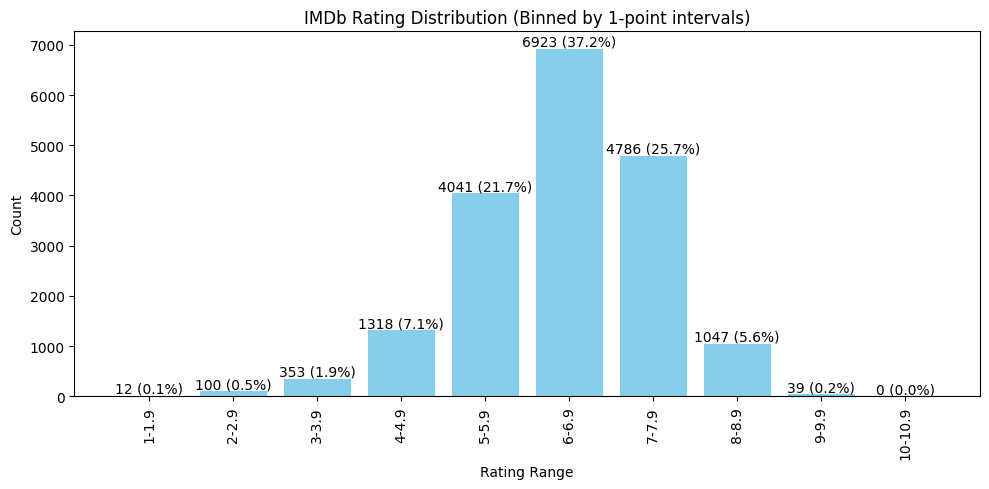

In [40]:
# Drop duplicates by imdbId to ensure uniqueness
ratings = df_final.drop_duplicates(subset=['imdbId'])['imdbAverageRating']

# Drop missing values
ratings = ratings.dropna()

# Define bin edges from 1.0 to 10.0 (inclusive) with step 1
bins = np.arange(1, 11.1, 1)  # 1.0 to 10.0

# Create labels for the bins (e.g., '1-1.9', ..., '9-9.9')
labels = [f'{int(i)}-{int(i)+0.9}' for i in bins[:-1]]

# Bin the ratings
rating_binned = pd.cut(ratings, bins=bins, right=False, labels=labels)

# Count the number of ratings in each bin
rating_counts = rating_binned.value_counts().sort_index()

# Show the result
print(rating_counts)

# Plot the result
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(rating_counts.index, rating_counts.values)
ax.set_title('IMDb Rating Distribution (Binned by 1-point intervals)')
ax.set_xlabel('Rating Range')
ax.set_ylabel('Count')
ax.set_xticklabels(rating_counts.index, rotation=90)
annotate_bars(ax, fmt='both')
plt.tight_layout()
plt.show()

> 📌 **Insights**
>
> - Most titles are rated between 5.0 and 7.9, with the peak in 6-6.9.
> - Low ratings (≤3.9) and high ratings (≥8.0) are rare.
> - No titles received a perfect 10.0 rating.
> - The distribution is heavily centered around average-to-good ratings.

## Rating Quality Tiers


===Rating Tier Distribution===

ratingTier
Poor           465
Average       5359
Good         11709
Excellent     1086
Name: count, dtype: int64


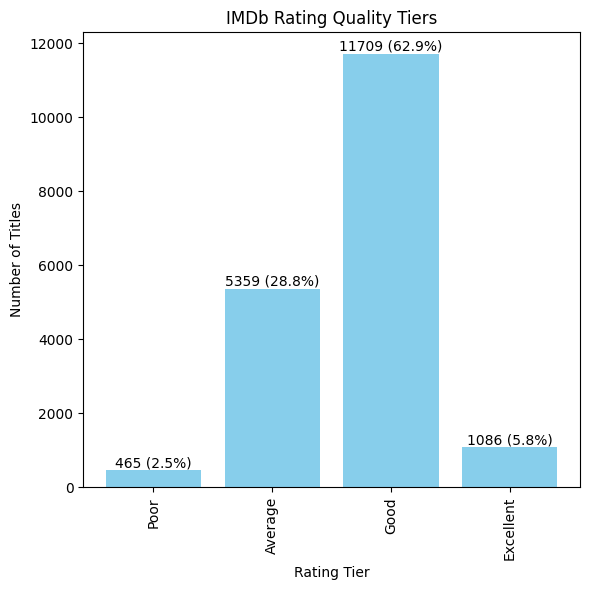

In [41]:
# Drop duplicate IMDb IDs to avoid counting the same title multiple times
df_cleaned = df_final.drop_duplicates(subset=['imdbId']).copy()

# Drop missing ratings
df_cleaned = df_cleaned.dropna(subset=['imdbAverageRating'])

# Define bins and corresponding labels
rating_bins = [1.0, 4.0, 6.0, 8.0, 10.0]
rating_labels = ['Poor', 'Average', 'Good', 'Excellent']

# Create a new column for rating category
df_cleaned['ratingTier'] = pd.cut(
    df_cleaned['imdbAverageRating'],
    bins=rating_bins,
    labels=rating_labels,
    right=False,  # Left-inclusive, right-exclusive: [1.0, 4.0)
    include_lowest=True  # Include the lowest boundary
)
# View distribution of categories
rating_tier_counts = df_cleaned['ratingTier'].value_counts().sort_index()
print("\n===Rating Tier Distribution===\n")
print(rating_tier_counts)

# Plot the distribution
fig, ax = plt.subplots(figsize=(6, 6))
plt.bar(rating_tier_counts.index, rating_tier_counts.values)
ax.set_title('IMDb Rating Quality Tiers')
ax.set_xlabel('Rating Tier')
ax.set_ylabel('Number of Titles')
ax.set_xticklabels(rating_tier_counts.index, rotation=90)
annotate_bars(ax, fmt='both')
plt.tight_layout()
plt.show()

> 📌 **Insights**
>
> The rating distribution is positively skewed, with most titles receiving above-average ratings. The Good tier dominates with 11,709 titles, followed by Average (5,359), Excellent (1,086), and Poor (465). This indicates that poorly rated titles are rare, while the majority of content is rated favorably.

## Catalog Composition


=== Title Count by Genre ===

genre
Drama          190922
Comedy         124052
Action          87678
Crime           68784
Adventure       64356
Romance         53902
Thriller        50021
Animation       39551
Mystery         35716
Horror          30538
Fantasy         23165
Documentary     22104
Biography       20861
Family          18779
Sci-Fi          15723
History         14004
Music            8503
Sport            7303
War              5626
Reality          4203
Musical          2532
Western          1964
Short            1768
Game-Show        1502
Talk-Show         304
Film-Noir         185
News               57
Adult              47
Kids               20
Name: count, dtype: int64

=== Unique Genres ===

['Crime', 'Romance', 'Comedy', 'Drama', 'Music', ..., 'Reality', 'Adult', 'Talk-Show', 'Game-Show', 'Kids']
Length: 29
Categories (29, object): ['Action', 'Adult', 'Adventure', 'Animation', ..., 'Talk-Show', 'Thriller', 'War', 'Western']


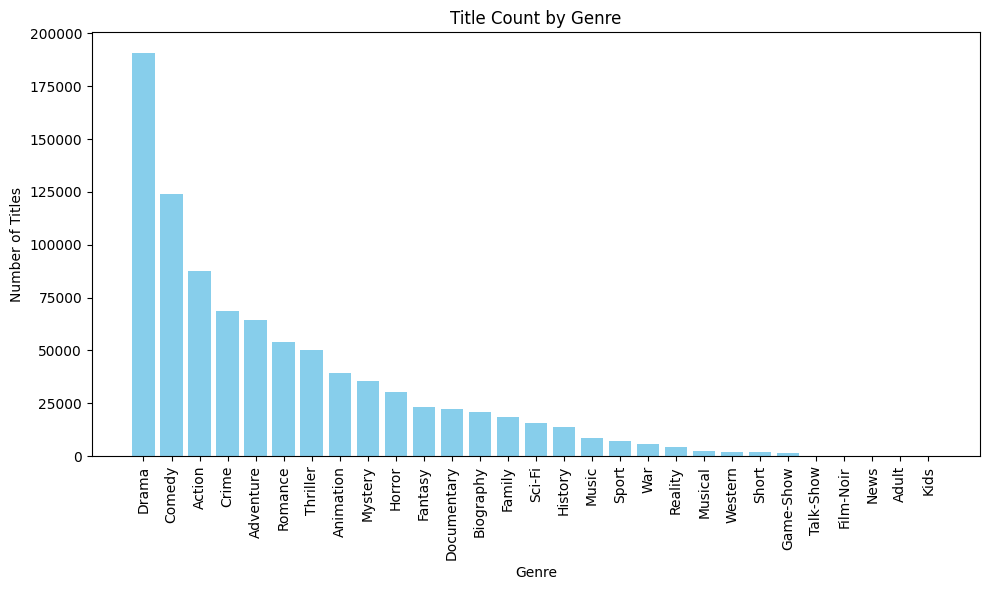

In [42]:
# Count the number of titles per genre
print('\n=== Title Count by Genre ===\n')
genre_counts = df_final['genre'].value_counts(dropna=False)
print(genre_counts)

# Show all unique genres present in the dataset
print('\n=== Unique Genres ===\n')
print(df_final['genre'].unique())

# Plot the distribution of titles per genre
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.title('Title Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> 📌 **Insights**
>
> - Drama leads by a wide margin with 190,922 titles, followed by Comedy (124,052) and Action (87,678), indicating a strong focus on these popular genres. Other frequently represented genres include Crime (68,784), Adventure (64,356), Romance (53,902), and Thriller (50,021), showing substantial variety in mainstream storytelling.
> - Animation (39,551), Mystery (35,716), and Horror (30,538) also have significant presence, catering to diverse audience interests.
> - Less common but notable genres such as Fantasy (23,165), Documentary (22,104), Biography (20,861), and Family (18,779) enrich the dataset’s diversity.
> - Niche genres like Musical (2,532), Western (1,964), Game-Show (1,502), and Talk-Show (304) have smaller but distinct representation.
> - Very rare genres such as News (57), Adult (47), and Kids (20) indicate minimal coverage or more specialized content focus.

### Content Distribution Across Categories

isAdult
No     18618
Yes        1
Name: count, dtype: int64


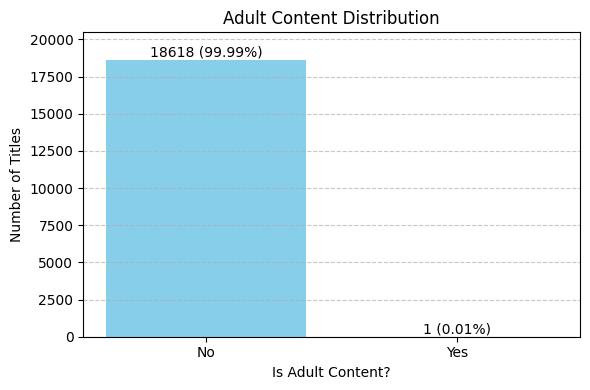

In [43]:
# Get value counts of 'isAdult' (after removing duplicates)
adult_dist = df_final.drop_duplicates(subset=['imdbId'])['isAdult'].value_counts().sort_index()

# Print the result
print(adult_dist)

# Define custom colors
colors = ['skyblue', 'orange']

# Create bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(adult_dist.index, adult_dist.values, color=colors)

# [Pending to be fixed with global function] Annotate bars with counts and percentages
total = adult_dist.sum()
for bar in bars:
    count = bar.get_height()
    percent = (count / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2, count + 0.5, f'{count} ({percent:.2f}%)',
             ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title('Adult Content Distribution')
plt.xlabel('Is Adult Content?')
plt.ylabel('Number of Titles')
plt.ylim(0, max(adult_dist.values) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


> 📌 **Insights**
>
> The dataset is clearly geared toward general audiences, with an overwhelming majority of titles marked as non-adult (18,618), and only a single entry categorized as adult content.

### Content Distribution Across Media

===Overall Distribution of Movies and TV Shows===

type
movie    15117
tv        3502
Name: count, dtype: int64


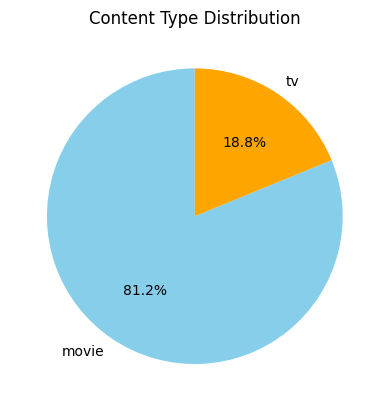

In [44]:
# Calculate content distribution by media
type_counts = df_final.drop_duplicates(subset=['imdbId'])['type'].value_counts()

# Define custom colors
colors = ['skyblue', 'orange']

# Print the distribution
print("===Overall Distribution of Movies and TV Shows===\n")
print(type_counts)

# Plot the results
plt.figure()
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Content Type Distribution')
plt.show()

> 📌 **Insights**
>
> The dataset is movie-dominant, with movies comprising over 81% of the content (15,117 movies vs. 3,502 TV shows), highlighting a strong emphasis on film-related titles.

### Changes in the Movie-to-TV Show Ratio Over Time


=== Movie-to-TV Show Ratio by Release Year ===
type         movie     tv Movie_to_TV_Label
releaseYear                                
1913            11      0       Only Movies
1917            32      0       Only Movies
1918            17      0       Only Movies
1919            66      0       Only Movies
1920            87      0       Only Movies
1921             5      0       Only Movies
1923            17      0       Only Movies
1926            24      0       Only Movies
1928           138      0       Only Movies
1929            91      0       Only Movies
1930             4      0       Only Movies
1931            84      0       Only Movies
1932           108      0       Only Movies
1933            30      0       Only Movies
1934            57      0       Only Movies
1935            49      0       Only Movies
1936           158      0       Only Movies
1937           194      0       Only Movies
1938           185      0       Only Movies
1939           220      0    

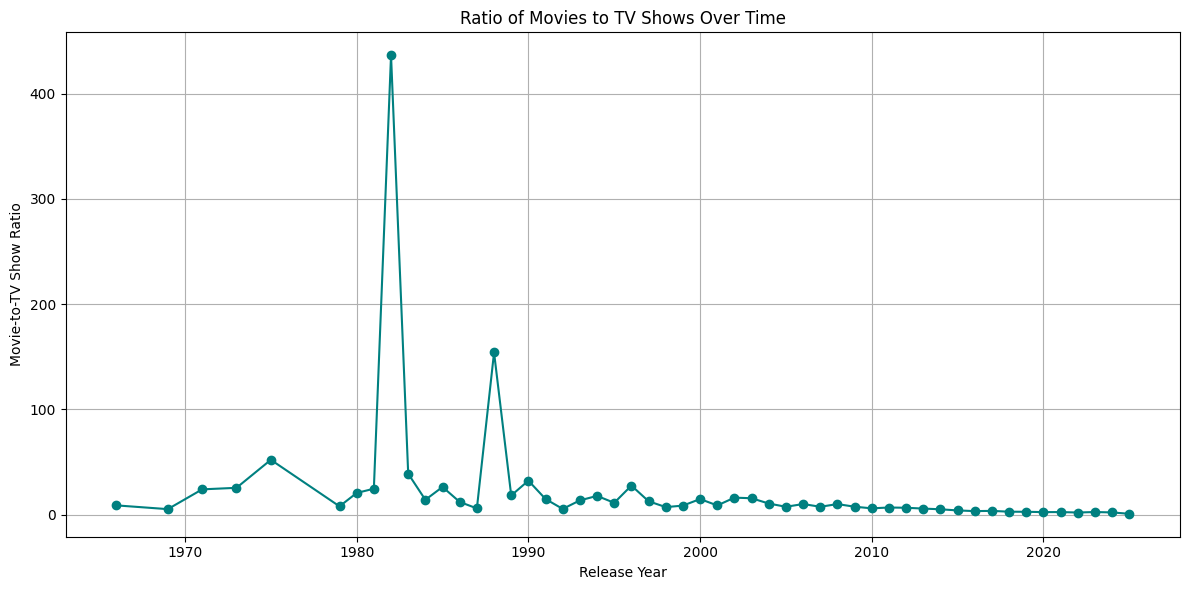

In [45]:
# Clean DataFrame
df_clean = df_final.dropna(subset=['releaseYear', 'type'])

# Group and count titles by year and type
titles_by_year_type = df_clean.groupby(['releaseYear', 'type']).size().unstack(fill_value=0)

# Extract movie and tv counts
movie_counts = titles_by_year_type.get('movie', pd.Series(0, index=titles_by_year_type.index))
tv_counts = titles_by_year_type.get('tv', pd.Series(0, index=titles_by_year_type.index))

# Calculate raw ratio, avoiding divide by zero
raw_ratio = movie_counts / tv_counts.replace(0, np.nan)

# Add a string column for display-friendly representation
titles_by_year_type['Movie_to_TV_Label'] = np.where(
    tv_counts == 0,
    'Only Movies',
    raw_ratio.round(2).astype(str)
)

# Optional: Also keep numeric ratio for plotting
titles_by_year_type['Movie_to_TV_Ratio'] = raw_ratio

# Show the result
with pd.option_context('display.max_rows', None):
    print("=== Movie-to-TV Show Ratio by Release Year ===")
    print(titles_by_year_type[['movie', 'tv', 'Movie_to_TV_Label']])

# Plot the result
plt.figure(figsize=(12, 6))
titles_by_year_type['Movie_to_TV_Ratio'].dropna().plot(marker='o', color='teal')

plt.title('Ratio of Movies to TV Shows Over Time')
plt.xlabel('Release Year')
plt.ylabel('Movie-to-TV Show Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


> 📌 **Insights**
>
> - **Pre-1965:** Dataset contains *only movies* — no TV show entries, reflecting early industry focus or data gaps.
> - **1966–1980s:** TV content emerges gradually. Ratios are extremely high (e.g., 436:1 in 1982), showing movie dominance.
> - **1990s–2000s:** TV volume increases steadily; movie-to-TV ratios drop into the 5–15 range, indicating growing balance.
> - **2010s–2024:** The ratio stabilizes around **2–3**, showing near-parity as streaming boosts TV production.
> - **2025:** First year where TV titles slightly exceed movies (ratio: **0.77**), though data may be incomplete.
> - `"Only Movies"` labels highlight years with no TV data, useful for filtering historical trends.

### Trends in Movie and TV Show Additions in Recent Years


type         movie     tv
releaseYear              
2016         29144   8801
2017         34857   9846
2018         40679  14779
2019         41254  15425
2020         36697  15522
2021         50385  21018
2022         58464  29410
2023         44444  18144
2024         28055  13582
2025          3628   4736


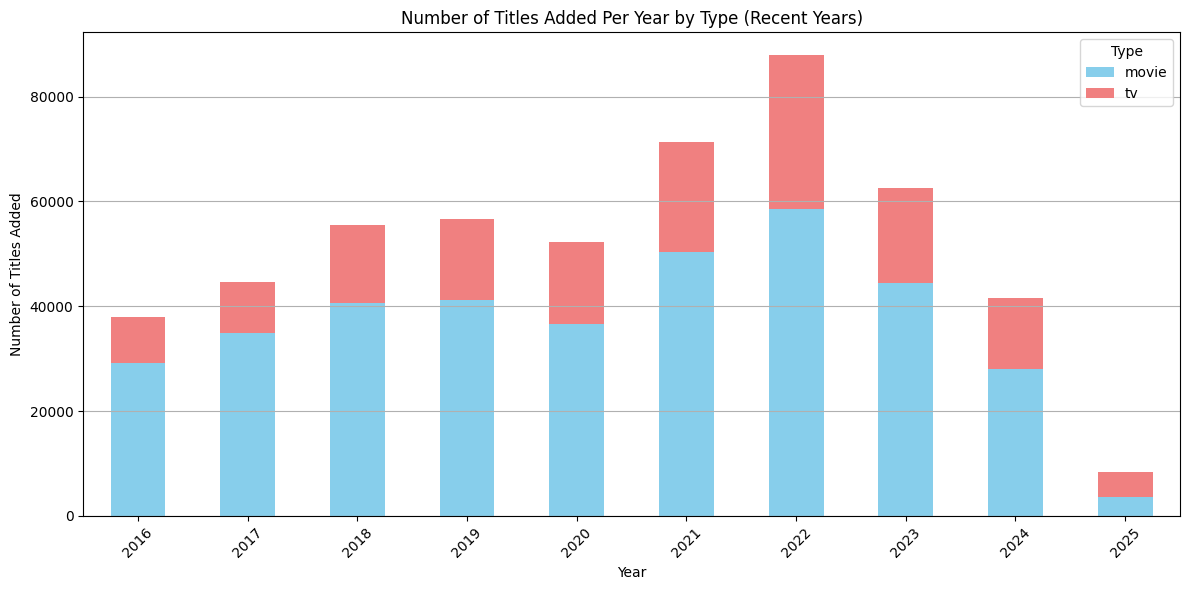

In [46]:
# Filter data for recent 10 years
latest_year = df_final['releaseYear'].max()
recent_years = df_final[(df_final['releaseYear'] >= latest_year - 9) & (df_final['releaseYear'] <= latest_year)]

# Group by release year and type, then count the number of titles
titles_by_year_type_recent = recent_years.groupby(['releaseYear', 'type']).size().unstack(fill_value=0)
print(titles_by_year_type_recent)

# Plot the counts for recent years
plt.figure(figsize=(12, 6))
titles_by_year_type_recent.plot(kind='bar', stacked=True, ax=plt.gca())

# Customize the plot
plt.title('Number of Titles Added Per Year by Type (Recent Years)')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Type')
plt.tight_layout()

# Show the plot
plt.show()


In [47]:
# Analyze which type is more frequent in the most recent year
most_recent_year_data = titles_by_year_type_recent.loc[latest_year]
print(f"\n===Titles added in the most recent year ({latest_year})===\n")
print(most_recent_year_data)

if 'movie' in most_recent_year_data and 'tv' in most_recent_year_data:
    if most_recent_year_data['movie'] > most_recent_year_data['tv']:
        print(f"\nIn the most recent year ({latest_year}), Movies were added more frequently.")
    elif most_recent_year_data['tv'] > most_recent_year_data['movie']:
        print(f"\nIn the most recent year ({latest_year}), TV Shows were added more frequently.")
    else:
        print(f"\nIn the most recent year ({latest_year}), the number of Movies and TV Shows added was equal.")
elif 'movie' in most_recent_year_data:
    print(f"\nIn the most recent year ({latest_year}), only Movies were added.")
elif 'tv' in most_recent_year_data:
     print(f"\nIn the most recent year ({latest_year}), only TV Shows were added.")
else:
    print(f"\nNo titles were added in the most recent year ({latest_year}).")


===Titles added in the most recent year (2025)===

type
movie    3628
tv       4736
Name: 2025, dtype: int64

In the most recent year (2025), TV Shows were added more frequently.


> 📌 **Insights**
>
> Both movies and TV shows saw significant growth from 2016 to 2022, peaking in 2022 with 58,464 movies and 29,410 TV shows.
>
>- 2016–2018: Steady increase in both content types; movies consistently outnumbered TV shows by more than 2:1.
> - 2019–2021: Continued growth with a slight slowdown in 2020 (likely pandemic-related), but a sharp rise again in 2021.
> - 2022 Peak: Represents the highest production year across the dataset for both categories.
> - 2023–2024: Noticeable decline in both movie and TV show counts, suggesting a possible saturation point or data lag in recent years.
> - 2025: Unusually, TV shows (4,736) slightly outnumber movies (3,628) — a potential early signal of a shift in content creation focus or incomplete data for the year.

### Content Release Trends in Relation to Events Like COVID-19


===Unique Content Counts by Phase and Type===

type                         movie    tv
phase                                   
Pre-COVID (<=2019)            9854  1607
Pandemic Years (2020-2021)    1779   600
Post-Pandemic Boom (>=2022)   3252  1275


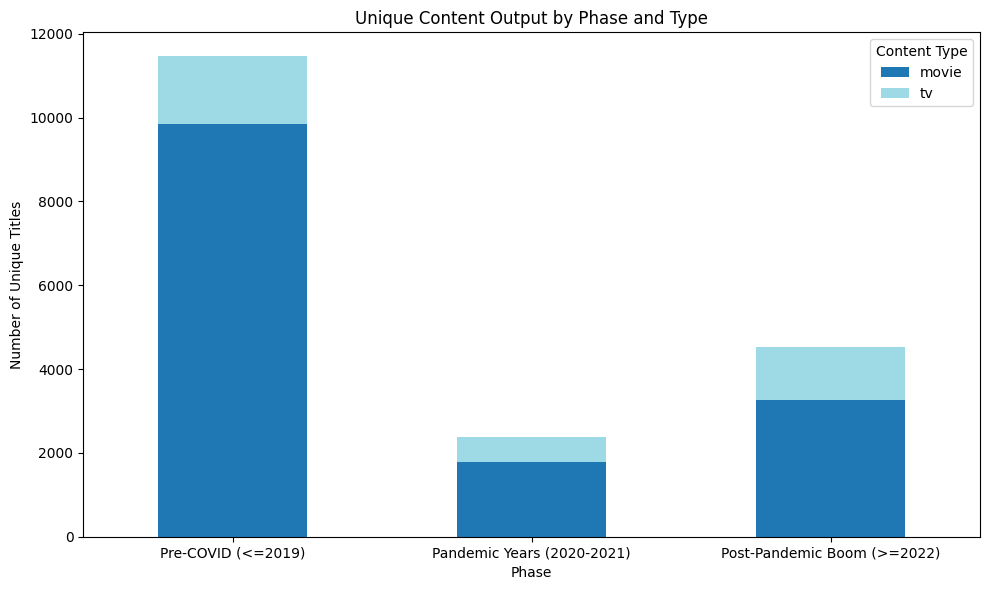

In [48]:
# Function to assign phases based on releaseYear
def assign_phase(year):
    if year <= 2019:
        return 'Pre-COVID (<=2019)'
    elif 2020 <= year <= 2021:
        return 'Pandemic Years (2020-2021)'
    else:
        return 'Post-Pandemic Boom (>=2022)'

df_final['phase'] = df_final['releaseYear'].apply(assign_phase)

# Drop duplicates to keep unique titles only
unique_titles = df_final.drop_duplicates(subset=['title', 'phase', 'type'])

# Group by phase and type, counting unique titles
phase_type_counts = unique_titles.groupby(['phase', 'type']).size().unstack(fill_value=0)

# Define desired order of phases with pandemic in the center
phase_order = ['Pre-COVID (<=2019)', 'Pandemic Years (2020-2021)', 'Post-Pandemic Boom (>=2022)']

# Reindex phase_type_counts to enforce order
phase_type_counts = phase_type_counts.reindex(phase_order)

# Show the counts
print("\n===Unique Content Counts by Phase and Type===\n")
print(phase_type_counts)

# Plot the results
phase_type_counts.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title('Unique Content Output by Phase and Type')
plt.xlabel('Phase')
plt.ylabel('Number of Unique Titles')
plt.xticks(rotation=0)
plt.legend(title='Content Type')
plt.xticks(ticks=range(len(phase_order)), labels=phase_order)
plt.tight_layout()
plt.show()

> 📌 **Insights**
>
> The analysis reveals a clear dip in unique content production during the pandemic followed by a robust resurgence in the post-pandemic years, especially in TV shows which almost doubled compared to the pandemic period.
>
> - **Pre-COVID Era (≤2019):** This period has the highest volume of unique content with 9,854 movies and 1,607 TV shows, reflecting a strong production baseline before the pandemic.
> - **Pandemic Years (2020-2021):** Content production noticeably declined during the pandemic, with 1,779 movies and 600 TV shows, likely impacted by COVID-19 restrictions and disruptions in filming and distribution.
> - **Post-Pandemic Boom (≥2022):**
A significant recovery and growth phase, featuring 3,252 movies and 1,275 TV shows, indicating an industry rebound and increased content output as restrictions eased.

## Country & Geographic Analysis

### Geographic Diversity of Netflix's Content (Unique Countries Represented)

In [49]:
# Count the number of unique countries in the 'country' column
unique_countries_count = df_final['country'].nunique()

# Print the result
print(f"Netflix’s content is available in {unique_countries_count} countries")

Netflix’s content is available in 162 countries


### Distribution and Preference of Content Types Within Each country (Top 30)

===Content type preference by country (Top 30 countries)===

type                       movie    tv  Total
country                                      
United States              12318  3203  15521
United Kingdom             11491  2914  14405
Germany                     9328  3231  12559
Canada                      9475  2993  12468
Japan                       8583  2939  11522
Australia                   8633  2701  11334
Russian Federation          8629  2433  11062
France                      8481  2488  10969
Italy                       7994  2748  10742
Spain                       8096  2520  10616
Brazil                      8073  2383  10456
India                       7482  2771  10253
Poland                      7782  2139   9921
Taiwan, Province of China   6716  2067   8783
Mexico                      5982  2501   8483
Sweden                      6592  1645   8237
Hungary                     6283  1681   7964
Argentina                   5785  1761   7546
Türkiye            

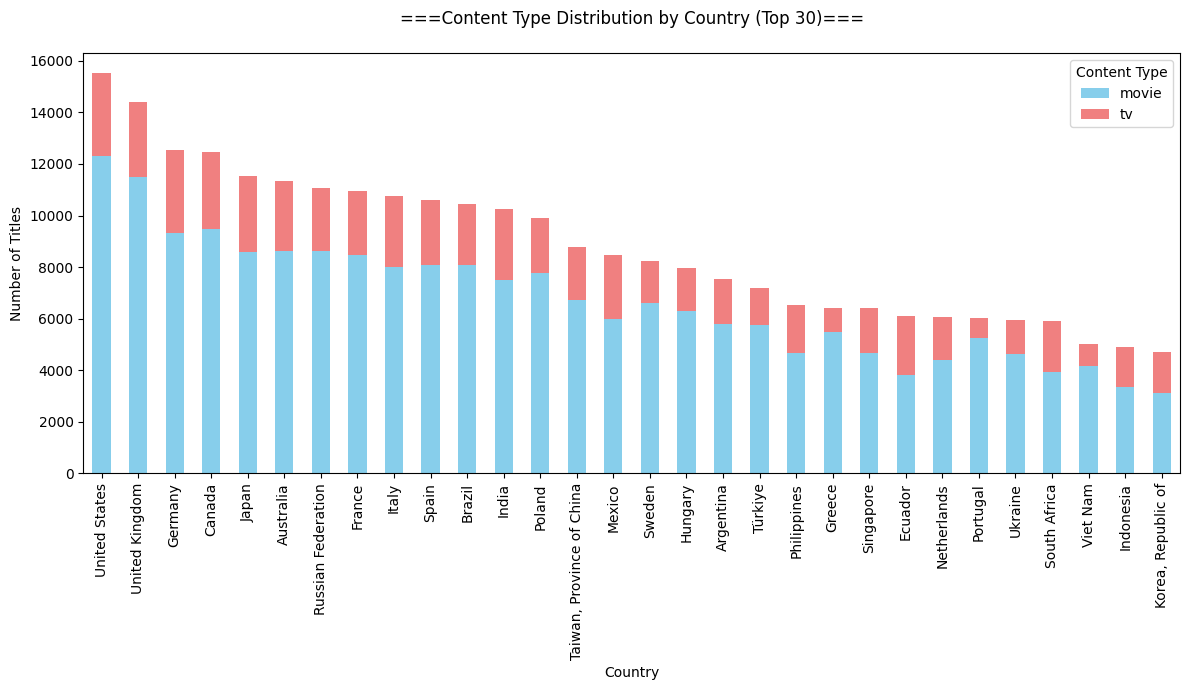

In [50]:
# Group by country and type, then count unique imdbIds
content_by_country_type = df_final.groupby(['country', 'type'])['imdbId'].nunique().unstack(fill_value=0)

# Calculate the total number of titles per country
content_by_country_type['Total'] = content_by_country_type['movie'] + content_by_country_type['tv']

# Sort by total titles to focus on countries with more content
content_by_country_type = content_by_country_type.sort_values(by='Total', ascending=False)

# Select the top N countries for better visualization (adjust N as needed)
top_n_countries = content_by_country_type.head(30)

print("===Content type preference by country (Top 30 countries)===\n")
print(top_n_countries)

# Plot the distribution for top countries
top_n_countries[['movie', 'tv']].plot(kind='bar', stacked=True, figsize=(12, 7))

# Customize the plot
plt.title('===Content Type Distribution by Country (Top 30)===\n')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.legend(title='Content Type')
plt.tight_layout()

# Show the plot
plt.show()

> 📌  **Insights**
>
> - **Leading Countries:** The United States and United Kingdom top the list with the highest total unique content output, producing over 15,500 and 14,400 titles respectively, with movies making up about 75–85% of content.
> - **European Powerhouses:** Countries like Germany, France, Italy, and Spain consistently produce a strong volume of movies, each contributing over 8,000 unique movies and several thousand TV titles.
> - **Diverse Global Representation:** Notable Asian countries including Japan, India, and Taiwan also show strong content creation, especially in movies, with totals exceeding 8,000 titles.
> - **Content Type Preference:** Across most countries, movies dominate the output, typically making up about 70-80% of total content. TV show production varies more, with some countries like Mexico and Brazil showing relatively higher TV counts compared to others.
> - **Emerging Markets:** Countries such as Philippines, South Africa, and Indonesia show growing TV content production, signaling emerging entertainment markets.

###  Content Type Preference by Continent


===Content type preference by continent===

type           movie    tv
continent                 
Africa          4564  1989
Asia           11966  3329
Europe         14004  3420
North America  12863  3325
Oceania         8658  2702
South America   9054  2952


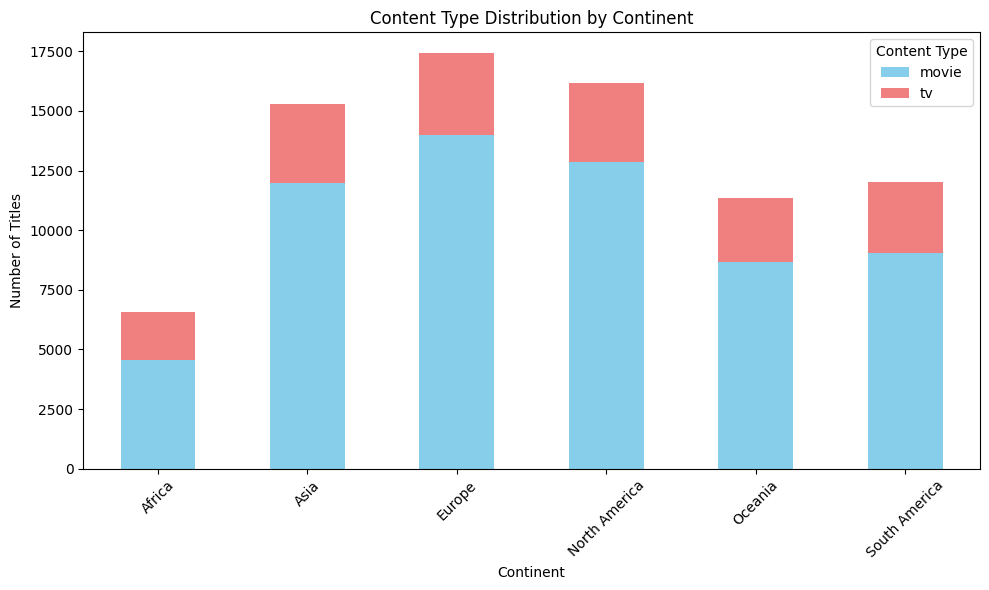

In [51]:
# Group by continent for a regional view
content_by_continent_type = df_final.groupby(['continent', 'type'])['imdbId'].nunique().unstack(fill_value=0)

print("\n===Content type preference by continent===\n")
print(content_by_continent_type)

# Plot the result
content_by_continent_type.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Content Type Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

> 📌 **Insights**
>
> - Europe leads in unique movie content production, followed closely by North America and Asia.
> - Asia and North America produce comparable amounts of TV content, both outpacing continents like Africa and Oceania.
> - Oceania (mainly Australia and New Zealand) also shows strong movie production relative to its size.
> - Africa and South America produce less content overall, with a stronger bias toward movies compared to TV.

### Overall Volume of Unique Titles From Each Country (Top 30)

===Title Distribution by Country (top30)===

country
United Kingdom        1583
India                 1544
United States         1330
Spain                  794
Australia              787
Germany                708
France                 698
Italy                  691
Canada                 626
Indonesia              520
Japan                  491
Philippines            485
Argentina              462
Mexico                 452
Brazil                 434
Netherlands            430
Sweden                 411
Singapore              389
Poland                 313
Hong Kong              290
Israel                 285
Hungary                284
Russian Federation     255
Ecuador                249
Korea, Republic of     217
Egypt                  202
Norway                 200
Ireland                192
South Africa           181
Greece                 163
Name: count, dtype: int64


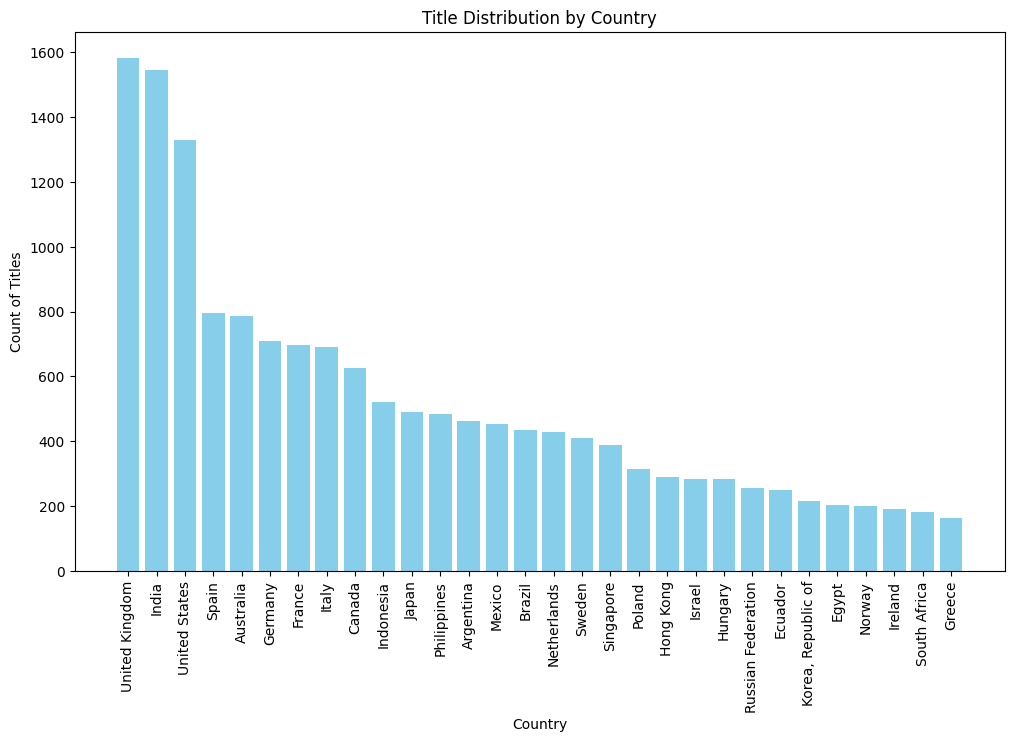

In [52]:
# Title distribution by country
country_counts = df_final.drop_duplicates(subset=['imdbId'])['country'].value_counts().head(30)

print("===Title Distribution by Country (top30)===\n")
print (country_counts)

# Plot the result
plt.figure(figsize=(12, 7))
plt.bar(country_counts.index, country_counts.values)
plt.title('Title Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count of Titles')
plt.xticks(rotation=90)
plt.show()

> 📌 **Insights**
>
> The dataset demonstrates a strong concentration of content from English-speaking countries and Europe, but also includes substantial contributions from Asia, Latin America, and Africa, showcasing a globally diverse media landscape.
>
> * **Top Contributors:** The United Kingdom (1,583 titles), India (1,544 titles), and United States (1,330 titles) lead in content availability, indicating these countries are major hubs of media production or distribution in the dataset.
> * **Strong European Presence:** Countries like Spain (794), Germany (708), France (698), Italy (691), Netherlands (430), Sweden (411), and Poland (313) show significant content contributions, reflecting the diversity and strength of the European media industry.
> * **Diverse Global Representation:**
  Beyond Europe and North America, countries such as Australia (787), Indonesia (520), Japan (491), Philippines (485), Argentina (462), Mexico (452), Brazil (434), and South Africa (181) illustrate a broad international content footprint.
> * **Emerging & Smaller Markets:**
  Nations with fewer titles, such as Hungary (284), Russian Federation (255), Ecuador (249), Korea, Republic of (217), Egypt (202), and Greece (163), suggest developing or niche media markets contributing uniquely to global content diversity.

### Distribution of Titles Across Continents


===Title Distribution by Continent===

continent
Europe           7780
Asia             5044
North America    2421
South America    1308
Oceania           936
Africa            423
Name: count, dtype: int64


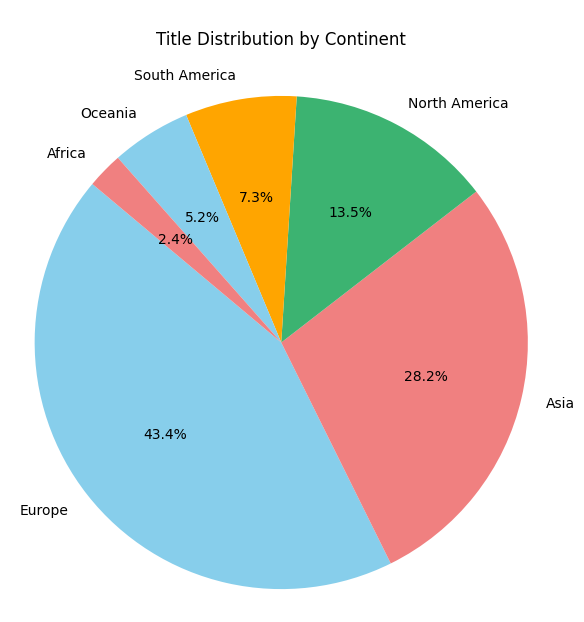

In [53]:
# Get unique titles by imdbId and count by continent
continent_counts = df_final.drop_duplicates(subset=['imdbId'])['continent'].value_counts()

print(f'\n===Title Distribution by Continent===\n')
print(continent_counts)

# Plot the result
plt.figure(figsize=(7,7))
plt.pie(continent_counts.values, labels=continent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('\nTitle Distribution by Continent\n')
plt.axis('equal')
plt.show()

> 📌 **Insights**
>
> The distribution reflects both production capabilities and dataset representation, suggesting regional trends in global media output.
> - Europe leads with 7,780 unique titles, showcasing its dominance in overall content production or availability.
> - Asia follows with 5,044 titles, reflecting a strong and diverse entertainment landscape.
> - North America contributes 2,421 titles, likely driven by the United States and Canada.
> - South America adds 1,308 titles, indicating growing but comparatively smaller output.
> - Oceania, with 936 titles, shows notable participation primarily from Australia and New Zealand.
> - Africa, with 423 titles, currently represents the smallest share, highlighting potential areas for content growth and investment.



### Evolution of Global (Non-U.S.) Content Share (1943-2025)

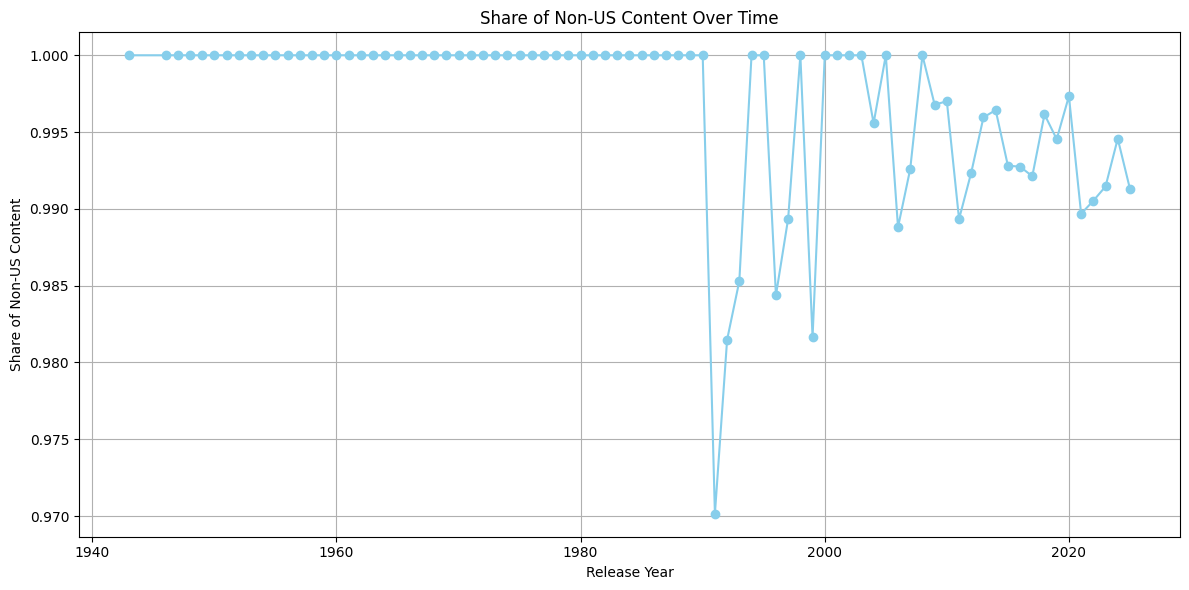

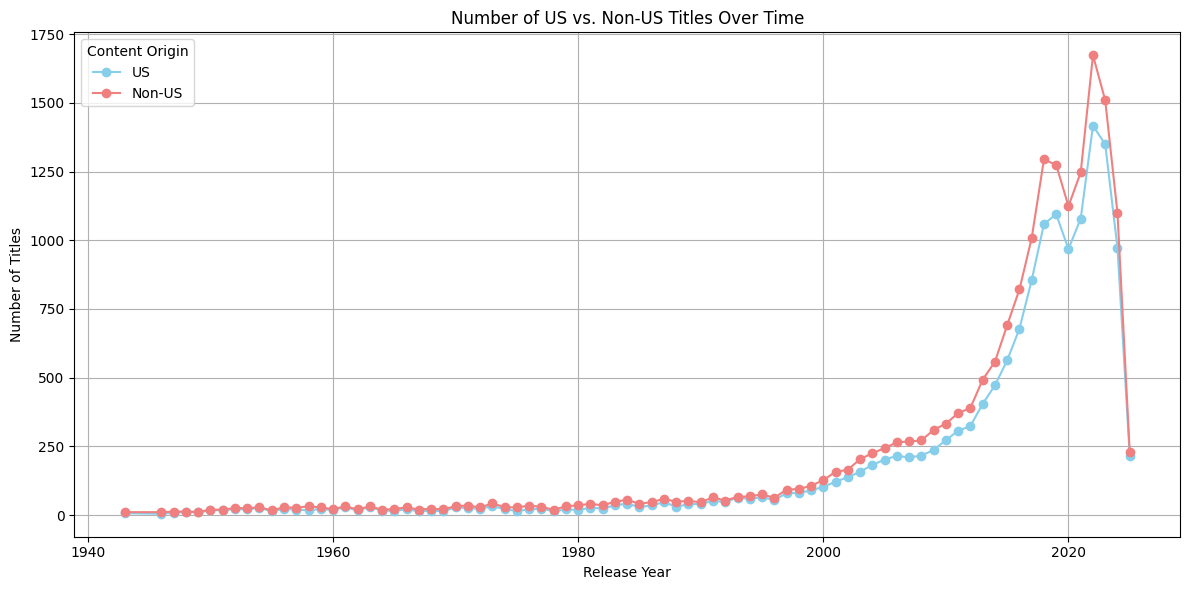

In [54]:
# Filter out entries where country is 'United States'
df_non_us = df_final[df_final['country'] != 'United States']

# Group by release year and count unique imdbIds for US and non-US content
us_content_by_year = df_final[df_final['country'] == 'United States'].groupby('releaseYear')['imdbId'].nunique().fillna(0)
non_us_content_by_year = df_non_us.groupby('releaseYear')['imdbId'].nunique().fillna(0)
total_content_by_year = df_final.groupby('releaseYear')['imdbId'].nunique().fillna(0)

# Combine into a single DataFrame, aligning years
content_share = pd.DataFrame({
    'US': us_content_by_year,
    'Non-US': non_us_content_by_year,
    'Total': total_content_by_year
}).fillna(0)

# Calculate the share of non-US content
# Add a small constant to avoid division by zero if a year has no content
content_share['Non-US Share'] = content_share['Non-US'] / (content_share['Total'] + 1e-6)

# Filter out years with very little content to avoid volatile ratios at the start
content_share = content_share[content_share['Total'] > 10] # Adjust threshold as needed

# Plot the evolution of non-US content share over time
plt.figure(figsize=(12, 6))
content_share['Non-US Share'].plot(kind='line', marker='o')

plt.title('Share of Non-US Content Over Time')
plt.xlabel('Release Year')
plt.ylabel('Share of Non-US Content')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Plot the absolute numbers of US vs. Non-US titles per year
plt.figure(figsize=(12, 6))
content_share[['US', 'Non-US']].plot(kind='line', marker='o', ax=plt.gca())

# Customize the plot
plt.title('Number of US vs. Non-US Titles Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.legend(title='Content Origin')
plt.tight_layout()

# Show the plot
plt.show()

> 📌 **Insights**
>
> The dataset reveals a consistently dominant share of non-U.S. content over time, even as U.S. title volumes grew in recent decades. This trend reflects a highly diversified global media ecosystem and suggests that metadata collection has become increasingly inclusive of international content.
>
> - **Dominance of Non-U.S. Content (1943–1990):**
  During this period, the share of non-U.S. titles remained at 100%, indicating either a lack of U.S.-origin titles in the dataset or the overwhelming presence of international content.
> - **Gradual Rise of U.S. Content Post-1990:**
  While non-U.S. representation remained strong, U.S. production began to grow in both absolute volume and share. Between 2020 and 2025, the non-U.S. share still hovered between **99.1% and 99.7%**, signaling continued global dominance.
> - **Global Volume Surge Since 2000:**
  The total number of titles increased sharply, underscoring both the expansion of global content creation and Netflix’s broader inclusion of non-U.S. titles in its library.
> - **Pandemic Years (2020–2021):**
  Despite the disruptions from COVID-19, content availability remained resilient for both U.S. and non-U.S. markets, with little drop in output.
>- **Recent Years (2022–2025):**
  Content production remains high, with a slight tapering in 2024–2025. Both U.S. and non-U.S. contributions continue to grow, reflecting increasing parity in production trends across regions.

### Country-Level Dominance in Movies vs. TV Shows


===Top 20 Countries by Total Titles===

type                       movie    tv  Movie_Percentage  TV_Percentage
country                                                                
United States              12318  3203             79.36          20.64
United Kingdom             11491  2914             79.77          20.23
Germany                     9328  3231             74.27          25.73
Canada                      9475  2993             75.99          24.01
Japan                       8583  2939             74.49          25.51
Australia                   8633  2701             76.17          23.83
Russian Federation          8629  2433             78.01          21.99
France                      8481  2488             77.32          22.68
Italy                       7994  2748             74.42          25.58
Spain                       8096  2520             76.26          23.74
Brazil                      8073  2383             77.21          22.79
India                  

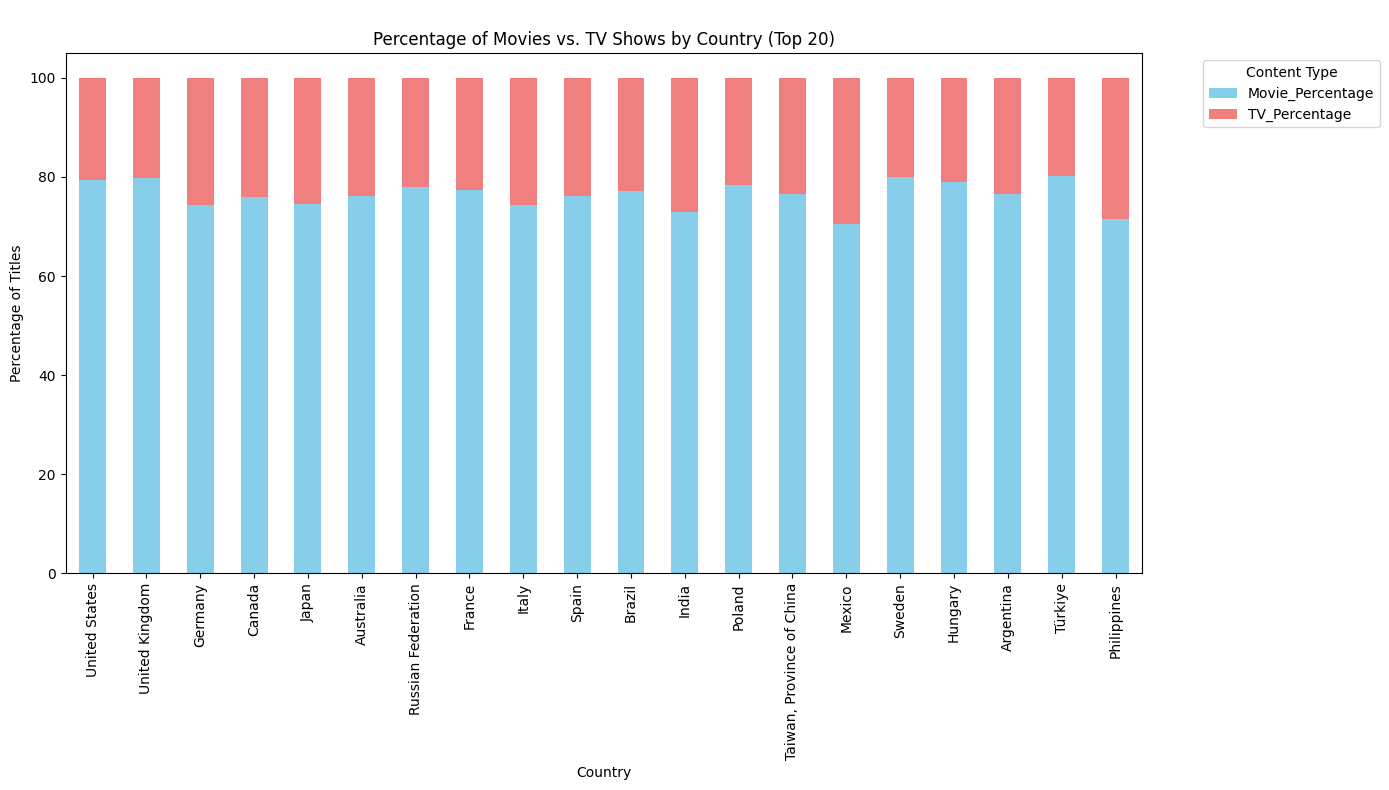

In [55]:
# Group by country and type, then count unique imdbIds
content_by_country_type = df_final.groupby(['country', 'type'])['imdbId'].nunique().unstack(fill_value=0)

# Calculate the total number of titles per country
content_by_country_type['Total'] = content_by_country_type['movie'] + content_by_country_type['tv']

# Calculate the percentage of Movies and TV Shows for each country
content_by_country_type['Movie_Percentage'] = (content_by_country_type['movie'] / content_by_country_type['Total']).fillna(0) * 100
content_by_country_type['TV_Percentage'] = (content_by_country_type['tv'] / content_by_country_type['Total']).fillna(0) * 100

# Sort by total titles to focus on countries with more content
content_by_country_type_sorted = content_by_country_type.sort_values(by='Total', ascending=False)

# Select the top N countries for analysis
top_n_countries = content_by_country_type_sorted.round(2). head(20)

print("\n===Top 20 Countries by Total Titles===\n")
print(top_n_countries[['movie', 'tv', 'Movie_Percentage', 'TV_Percentage']])

# Plot the result
top_n_countries[['Movie_Percentage', 'TV_Percentage']].plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('\nPercentage of Movies vs. TV Shows by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Percentage of Titles')
plt.xticks(rotation=90)
plt.legend(title='Content Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

> 📌 **Insights**
>
> - **Overall:** Movies dominate content production across all top 20 countries, consistently making up 70-80% of total titles. TV shows contribute a smaller share, typically 20-30%, but certain countries show a stronger inclination toward TV content.
> - **Highest Movie Share:** Turkey (80.14%),Sweden (80.03%), United Kingdom (79.77%), and United States (79.36%) exhibit a strong preference for movie production, with TV making up less than 21%.
> - **Balanced Mix:** Mexico (TV: 29.5%), India (TV: 27.0%), Italy (TV: 25.6%), and Japan (TV: 25.5%) show a relatively higher share of TV content, indicating a more diversified media production ecosystem.
> - **Moderate TV Presence (\~22-24%):** Common across France, Australia, Brazil, Canada, and others, showing a stable but secondary emphasis on serialized content.

### Titles Available Across Multiple Countries

country_bin
2-5        3231
6-10       3044
11-20      4205
21-50      6474
51-100      735
101-200      23
Name: count, dtype: int64


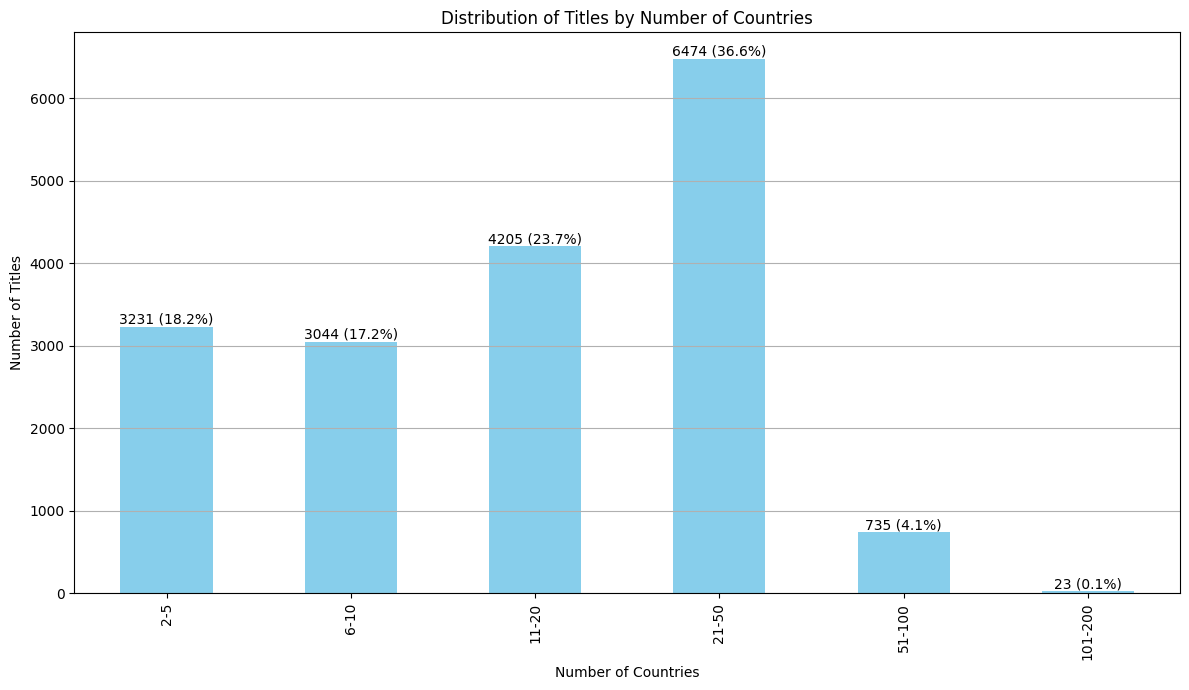

In [56]:
# Drop duplicates to ensure one entry per title-country pair
df_unique = df_final[['title', 'imdbId', 'country']].drop_duplicates()

# Count the number of unique countries per title
title_country_counts = df_unique.groupby(['title', 'imdbId']).country.nunique().reset_index()
title_country_counts = title_country_counts.rename(columns={'country': 'num_countries'})

# Filter to only titles available in more than one country and copy to avoid warnings
multi_country_titles = title_country_counts[title_country_counts['num_countries'] > 1].copy()

# Define bins and labels
bins = [1, 5, 10, 20, 50, 100, 200]
labels = ['2-5', '6-10', '11-20', '21-50', '51-100', '101-200']

# Categorize into bins
multi_country_titles['country_bin'] = pd.cut(multi_country_titles['num_countries'], bins=bins, labels=labels, right=True)

# Count number of titles in each bin
bin_distribution = multi_country_titles['country_bin'].value_counts().sort_index()

# [pending to be deleted in Kaggle]
# Print bin distribution
print(bin_distribution)

# Plot the distribution
fig, ax = plt.subplots(figsize=(12, 7))
ax = bin_distribution.plot(kind='bar')

ax.set_title("Distribution of Titles by Number of Countries")
ax.set_xlabel("Number of Countries")
ax.set_ylabel("Number of Titles")
plt.grid(axis='y')

annotate_bars(ax, fmt='both')
plt.tight_layout()
plt.show()

> 📌 **Insights**
>
> Most titles have moderate international availability, with the largest group (6,474) available in 21 to 50 countries, showing broad but not global reach. There is a strong presence in lower to mid-range availability: 3,231 titles in 2-5 countries, 3,044 in 6-10, and 4,205 in 11-20 countries, indicating many titles target regional or continental markets. Availability drops sharply beyond 50 countries, with only 735 titles in 51-100 countries and just 23 titles reaching 101-200 countries, highlighting that truly global availability is rare.

### Most Widely Distributed Titles (Top 30)


===Top 30 Most Widely Distributed Titles===

                                                   title  num_countries
1717                              Barbie: Epic Road Trip            130
7435               Johnny Test's Ultimate Meatloaf Quest            130
13389           Spirit Riding Free: Ride Along Adventure            130
17922                                  We Lost Our Human            130
1699                              Barba, Cabelo & Bigode            130
1758                                        Battle Kitty            130
4702                               Escape the Undertaker            130
6180                         Headspace: Unwind Your Mind            130
7518    Jurassic World Camp Cretaceous: Hidden Adventure            129
15451                                    The Last Forest            128
15457    The Last Kids on Earth: Happy Apocalypse to You            128
2687              Captain Underpants: Epic Choice-o-Rama            128
5903              

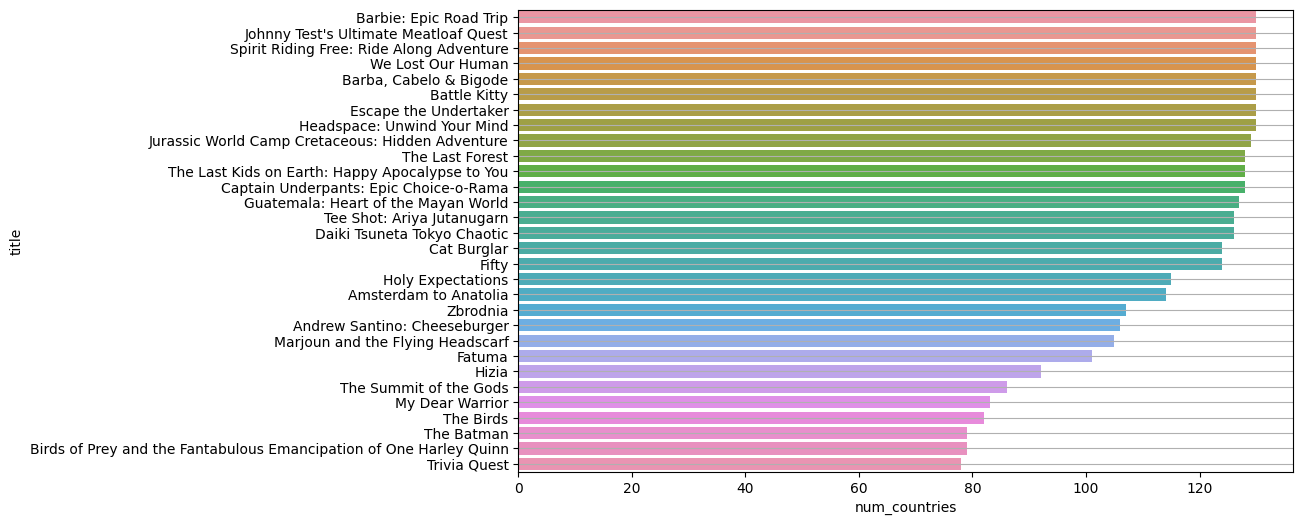

In [57]:
# Top 30 titles available in the most countries
top_n = 30
print(f'\n===Top {top_n} Most Widely Distributed Titles===\n')

# Sort by num_countries and show only relevant columns
top_titles = title_country_counts.sort_values(by='num_countries', ascending=False).head(top_n)
print(top_titles[['title', 'num_countries']])

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=top_titles, x='num_countries', y='title')
ax.set_title("Top 30 Most Widely Distributed Titles")
ax.set_xlabel("Number of Countries")
ax.set_ylabel("Titles")
plt.grid(axis='y')

plt.show()

> 📌 **Insights**
>
> - **High Global Reach:** The top 8 titles are available in 129 to 130 countries, indicating a nearly global presence. Titles like *Battle Kitty*, *Escape the Undertaker*, and *Barbie: Epic Road Trip* have exceptionally wide distribution.
> - **Strong Presence of Animation and Family Content:**
  Many highly distributed titles are animated or family-oriented shows (*Spirit Riding Free*, *Jurassic World Camp Cretaceous*, *Captain Underpants*), suggesting these genres have broad international appeal.
> - **Wide Genre Variety:** Beyond family content, there are documentaries (*Guatemala: Heart of the Mayan World*), comedies (*Andrew Santino: Cheeseburger*), and dramas (*The Last Forest*), showing diverse content types can also achieve wide availability.
> - **Gradual Decline Beyond the Top Few:** After the top 8 titles with 129–130 countries, availability slowly declines to titles available in the 70s and 80s number of countries, but still representing a large global footprint.
> - **Titles with Regional or Niche Appeal:** Lower-ranked titles in this top 30 list are still broadly available but may target specific international markets or audiences.

## Time-Based Trends


### Trends in Titles Released Over the Years

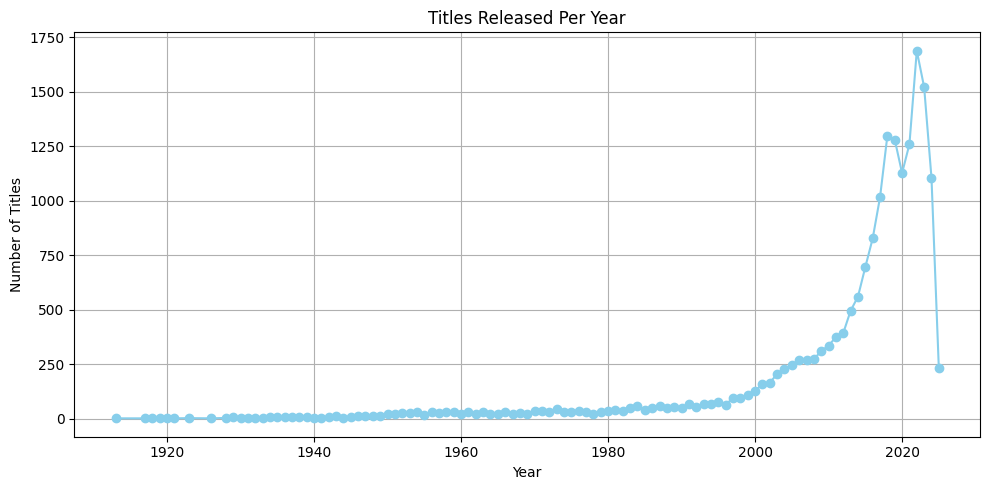

In [58]:
# Drop duplicates by imdbId to avoid counting same title multiple times
unique_titles = df_final.drop_duplicates(subset=['imdbId'])

# Yearly release count (for trend analysis)
title_count_by_year = unique_titles['releaseYear'].value_counts().sort_index()

# Most common release years (for frequency ranking)
most_common_years = unique_titles['releaseYear'].value_counts().sort_values(ascending=False)

# Plot the trends
plt.figure(figsize=(10, 5))
plt.plot(title_count_by_year.index, title_count_by_year.values, marker='o')
plt.title('Titles Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()

> 📌 **Insights**
>
> - **Recent Surge (2018–2024):** Content production peaked in 2022 (1,689 titles), driven by the rise of streaming platforms, global demand for digital content, and easier access to production tools.
>- **COVID-19 Impact and Recovery:** A noticeable dip in 2020 (1,127 titles) aligns with pandemic disruptions, followed by a strong rebound in 2021-2023, maintaining high release volumes.
> - **Pre-Streaming Era Decline (Before 2018):** Title releases gradually decreased moving backward from 2017, reflecting a time before widespread streaming-driven growth.
> - **Low Output Before 2000:** Most years before 2000 saw fewer than 300 releases, with especially low volumes before 1980 — due to limited distribution, digitization, and production capacity.
> - **Long Tail of Historical Content:** Titles dating back to **1913** highlight the presence of classic or archival films still available today, though in small numbers.

### Top 20 Most Productive Years for Content

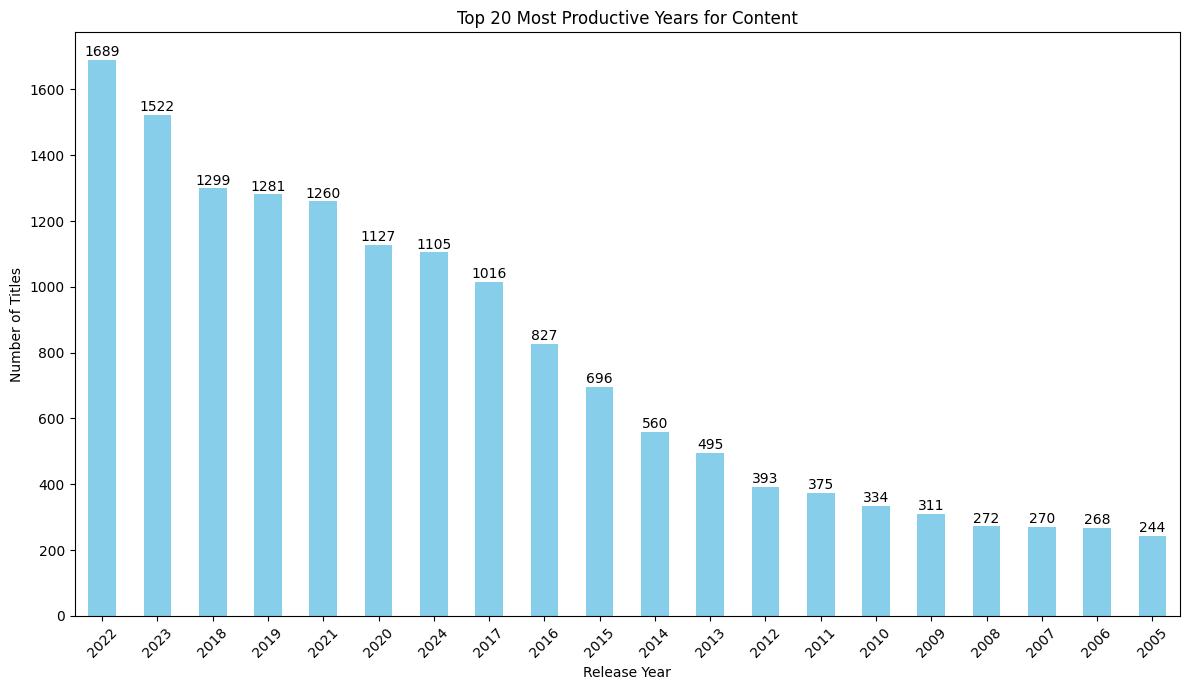

In [59]:
top_n = 20
fig, ax = plt.subplots(figsize=(12, 7))
most_common_years.head(top_n).plot(kind='bar')

# Plot the result
ax.set_title(f'Top {top_n} Most Productive Years for Content')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Titles')
plt.xticks(rotation=45)

annotate_bars(ax, fmt="count")
plt.tight_layout()
plt.show()

> 📌 **Insights**
>
> - **Modern Era Surge (2018–2023):** Recent years mark a high point in title production, with 2022 (1,689 titles) and 2023 (1,522) leading. This surge is fueled by the growth of streaming platforms, wider global content demand, and easier digital production.
> - **Gradual Decline Before 2016:** Production steadily decreases from 2015 back to 2000, with annual outputs ranging from 127 to 827 titles, reflecting slower growth before the digital streaming boom.
> - **Sparse Output Pre-2000:** Most years before 2000 saw fewer than 100 titles, more likely due to limited distribution, higher production costs, and less digitization of older content.
> - **🏛️ Archival Depth:** A small but notable number of titles date back to as early as 1913, showcasing the availability of classic and historically significant films on modern platforms.

### Content Release Trends: Comparing Pre- and Post-Streaming Eras

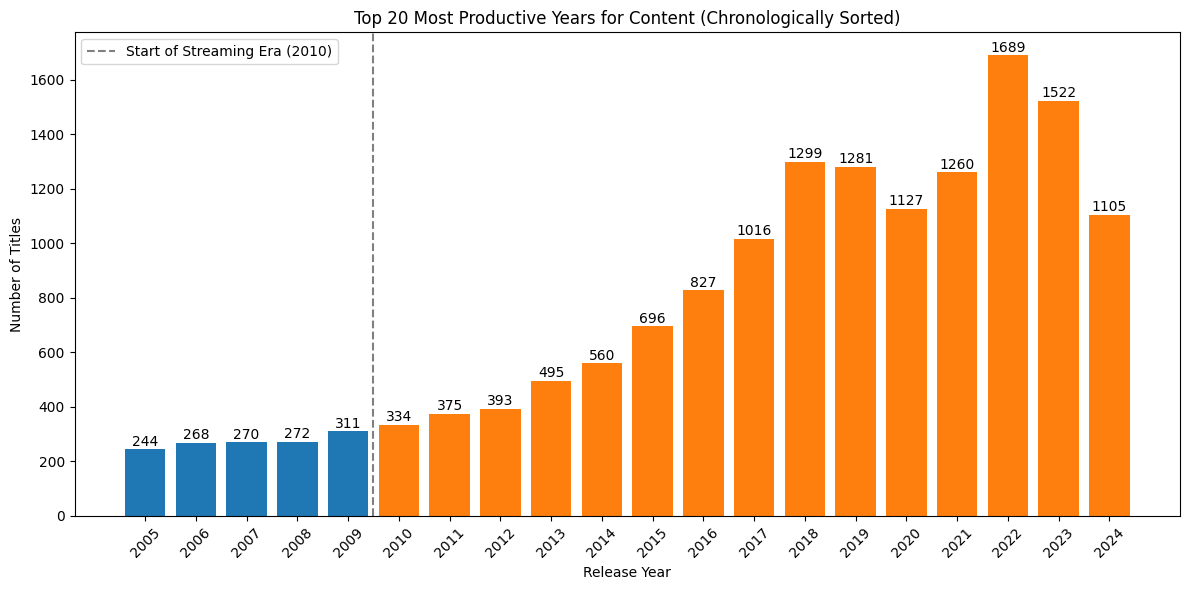

In [60]:
# Initialize start year and year count
streaming_start_year = 2010
top_n = 20

# Take top N years by count
top_years = most_common_years.head(top_n)

# Sort top years by year
top_years_sorted = top_years.sort_index()

years = top_years_sorted.index.tolist()
counts = top_years_sorted.values

# X positions
x_pos = np.arange(len(years))

# Customize colors for pre/post streaming era
bar_colors = ['#1f77b4' if year < streaming_start_year else '#ff7f0e' for year in years]

# Find streaming era index
streaming_index = next((i for i, year in enumerate(years) if year >= streaming_start_year), None)

# Plot the result
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(x_pos, counts, color=bar_colors)

# Add streaming era vertical line
if streaming_index is not None:
    plt.axvline(x=streaming_index - 0.5, color='gray', linestyle='--', label='Start of Streaming Era (2010)')

# Add labels and legend to plot
ax.set_title(f'Top {top_n} Most Productive Years for Content (Chronologically Sorted)')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Titles')
ax.set_xticks(x_pos, years, rotation=45)
plt.legend()

annotate_bars(ax, fmt='count')
plt.tight_layout()
plt.show()

> 📌 **Insights**
>
> The data reflects a dramatic acceleration in content production starting roughly in 2010, marking the streaming-driven era. The surge is particularly sharp after 2017, highlighting how streaming services have become dominant content creators, fundamentally transforming the media landscape.
>
> - **Significant Growth in Recent Years (Post-2017):** The volume of titles released has surged dramatically since 2017, with 2022 (1689 titles) and 2023 (1522 titles) topping the list. This reflects the explosion of content production, likely driven by streaming platforms investing heavily in original content.
> - **Streaming Era Impact (2010 Onwards):** Starting from around 2010, there is a clear upward trend in the number of titles released. This aligns with the rise of streaming platforms that disrupted traditional production and distribution models, accelerating content creation.
> - **Pre-Streaming Era (Before 2010) Has Relatively Low Production:** Years before 2010 generally show fewer titles released annually, hovering between \~244 and \~334 titles. This highlights how traditional TV and film industries had slower content output compared to the modern era.
> - **Recent Peak Despite Potential Data Incompleteness for 2023-2024:** Although 2023 and 2024 already show very high title counts, keep in mind that the full data for these years may still be incomplete depending on when the dataset was compiled, meaning the actual counts could be even higher.
> - **Consistent Growth from 2010 to 2017:** Between 2010 and 2017, the number of titles released each year gradually increased from 334 to 1016. This suggests a steady buildup toward the massive production scale seen after 2017.
> - **Possible Saturation or Plateau Beyond 2022:** While 2022 is the highest on the list, 2023 and 2024 show slightly lower counts (1522 and 1105 respectively), which might indicate a plateau or slight decline, though data completeness and external factors (e.g., industry changes) should be considered.

## Common Words and Phrase Patterns



### Find Similar Titles Through Text Analysis

**Prepare Data and Define Search Function**

In [61]:
# Prepare data
df_final['title'] = df_final['title'].fillna('').astype(str)

# Get unique titles
unique_titles = df_final['title'].drop_duplicates().reset_index(drop=True)
unique_df = pd.DataFrame({'title': unique_titles})

# Use char-based TF-IDF for better handling of short strings
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(3, 5), lowercase=True)
tfidf_matrix = vectorizer.fit_transform(unique_titles)

# Define search function
def find_similar_titles(title, top_n=5):
    title_vec = vectorizer.transform([title])
    cosine_sim = cosine_similarity(title_vec, tfidf_matrix).flatten()
    similar_indices = cosine_sim.argsort()[-(top_n+1):][::-1]

    # Get matching titles and their similarity
    similar_titles = unique_df.iloc[similar_indices].copy()
    similar_titles['similarity'] = cosine_sim[similar_indices]

    # Remove the query title itself from the result
    similar_titles = similar_titles[similar_titles['title'].str.lower() != title.lower()]

    return similar_titles.head(top_n)

**Setup Widget for Interaction**

> ⚠️ **Warning**
>
> This section includes interactive widgets built with `ipywidgets`. They function in **Edit Mode** on Kaggle or when running the notebook locally. If you're in **View Mode**, switch to **Edit Mode** or use a local Jupyter environment to interact with the widgets.

In [62]:
# Section heading using HTML
heading = widgets.HTML(value="<h3>Enter title to search movies</h3>")

# Widgets for user input
title_input = widgets.Text()
topn_input = widgets.IntSlider(value=5, min=1, max=50, step=1, description='No. of Titles:')

# Button to trigger the search
search_button = widgets.Button(description="🔍 Find Titles")

# Output widget
output = widgets.Output()

# Define button click behavior
def on_search_clicked(b):
    with output:
        output.clear_output()
        title = title_input.value
        top_n = topn_input.value
        result = find_similar_titles(title, top_n)
        display(result[['title', 'similarity']])

search_button.on_click(on_search_clicked)

# Show the interactive UI
display(widgets.VBox([heading,title_input, topn_input, search_button, output]))

### Most Common Words (Frequency Analysis)

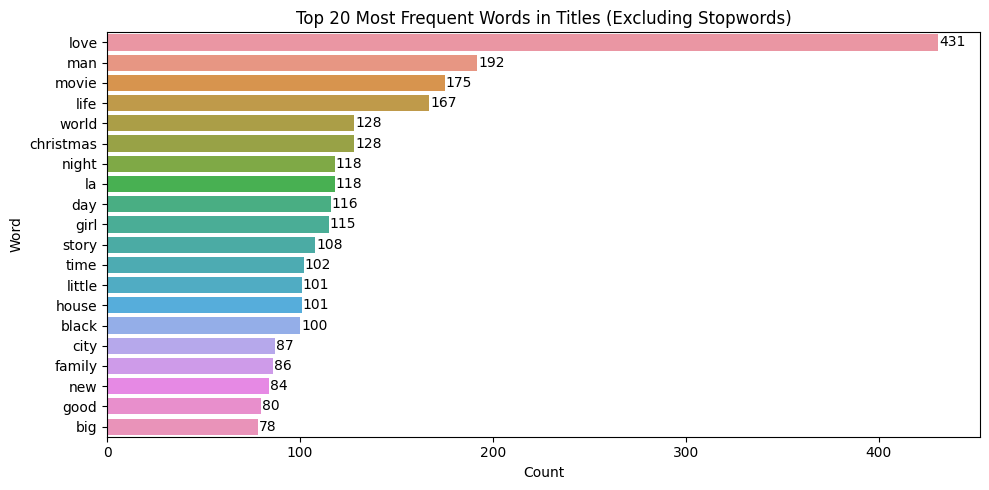

In [63]:
# Function to clean and tokenize titles
def tokenize(title):
    # Convert to lowercase, remove all non-alphanumeric characters except spaces
    title_clean = re.sub(r'[^a-zA-Z0-9 ]', '', title.lower())
    # Split the cleaned title into words
    return title_clean.split()

# Drop duplicates based on 'imdbId' first, then get titles
unique_titles = df_final.drop_duplicates(subset=['imdbId'])['title'].astype(str).dropna()

# Apply tokenize on unique titles
tokenized_titles = unique_titles.apply(tokenize)

# Flatten the list of token lists into a single list of words
all_words = [word for tokens in tokenized_titles for word in tokens]

# Remove common English stopwords and filter out very short words (length <=1)
filtered_words = [word for word in all_words if word not in ENGLISH_STOP_WORDS and len(word) > 1]

# Count the frequency of each word and select the top 20 most common words
common_words = Counter(filtered_words).most_common(20)

# Convert the counts into a DataFrame for easier plotting
common_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the result
plt.figure(figsize=(10, 5))
sns.barplot(data=common_df, x='count', y='word')

# Add count labels on each bar
for index, row in common_df.iterrows():
    plt.text(row['count'] + 0.5, index, str(row['count']), va='center')

plt.title('Top 20 Most Frequent Words in Titles (Excluding Stopwords)')
plt.xlabel('Count')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

> 📌 **Insights**
>
> The most common words appearing in titles reveal key thematic elements and settings popular across the dataset. The word frequency data reflects the prominence of emotionally resonant, relationship-centered stories set in familiar urban or domestic environments, with a notable seasonal emphasis. This likely mirrors broad audience interests and popular content trends.
> - **Emotional and Human Themes:** Words like "love" (431 occurrences), "man" (192), "life" (167), "girl" (115), and "family" (86) suggest a strong focus on personal relationships and human experiences.
> - **Storytelling Elements:** Frequent use of words such as "movie" (175), "story" (108), "time" (102), and "little" (101) highlights narrative-driven content.
> - **Settings and Atmosphere:** Words like "world" (128), "city" (87), "house" (101), "la" (118), "night" (118), "day" (116), and "black" (100)indicate common locations and moods featured in titles.
> - **Seasonal & Event References:** The presence of "christmas" (128) points to a significant number of holiday-themed productions.
> - **Descriptors:** Words such as "new" (84), "good" (80), and "big" (78) suggest emphasis on freshness, positivity, and scale in titles.

### Use of Numbers in Title (e.g., sequels: "2", "III", etc.)

In [64]:
# Get unique titles
unique_titles = df_final['title'].drop_duplicates().reset_index(drop=True)

# Improved pattern for numeric detection (Arabic + clean Roman numerals)
numeric_pattern = r'\b\d+\b|\b(I|II|III|IV|V|VI|VII|VIII|IX|X)\b'

# Detect titles with numeric components (e.g., sequels)
has_number = unique_titles.str.contains(numeric_pattern, regex=True, case=False)
number_titles_count = has_number.sum()

# Print results
print(f"\nFound {number_titles_count} Unique Titles with Numeric Parts")
print(unique_titles[has_number])


Found 1359 Unique Titles with Numeric Parts
11                                  8 Mile
15                      American History X
28                    Beverly Hills Cop II
53                                 48 Hrs.
58              Back to the Future Part II
                       ...                
17908    The Comeback: 2004 Boston Red Sox
17909                       Tomorrow and I
17925              900 Days Without Anabel
17939                           I Am Ilary
17986      A Tragedy Foretold: Flight 3054
Name: title, Length: 1359, dtype: object


### Detect Titles with Non-Latin Characters

In [65]:
## Detect titles with non-Latin characters (e.g., Japanese, Korean, etc.)
df_final['non_english'] = unique_titles.apply(lambda x: bool(re.search(r'[^\x00-\x7F]', x)))
non_english_count = df_final['non_english'].sum()

print(f"\n Non-English titles (with non-ASCII characters): {non_english_count}")


 Non-English titles (with non-ASCII characters): 1442


### Distribution of Title Lengths

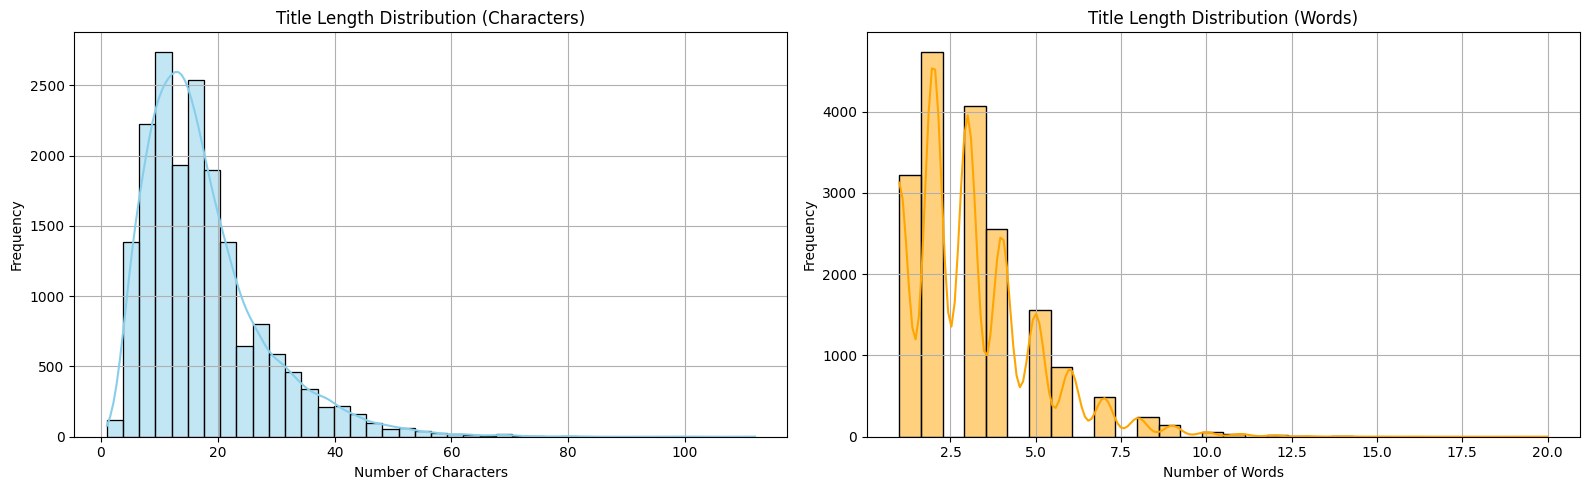


===Summary of Title Lengths (in characters)===

count    17992.000000
mean        17.471988
std         10.216303
min          1.000000
25%         10.000000
50%         15.000000
75%         22.000000
max        112.000000
Name: title_length_chars, dtype: float64

===Summary of Title Lengths (in words)===

count    17992.000000
mean         3.115162
std          1.848786
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         20.000000
Name: title_length_words, dtype: float64

===Shortest Titles (by character)===

3 (1 characters)
I (1 characters)
X (1 characters)
H (1 characters)
W (1 characters)

===Longest Titles (by character)===

The Strongest Tank's Labyrinth Raids -A Tank with a Rare 9999 Resistance Skill Got Kicked from the Hero's Party- (112 characters)


In [66]:
# Create a DataFrame from unique titles
unique_df = pd.DataFrame({'title': unique_titles})

# Character count (including spaces and punctuation)
unique_df['title_length_chars'] = unique_df['title'].str.len()

# Word count (number of space-separated tokens)
unique_df['title_length_words'] = unique_df['title'].str.split().str.len()

# Plot the distribution
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Distribution by Character Count
sns.histplot(unique_df['title_length_chars'], bins=40, kde=True, color='skyblue', ax=axs[0])
axs[0].set_title('Title Length Distribution (Characters)')
axs[0].set_xlabel('Number of Characters')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# Distribution by Word Count
sns.histplot(unique_df['title_length_words'], bins=30, kde=True, color='orange', ax=axs[1])
axs[1].set_title('Title Length Distribution (Words)')
axs[1].set_xlabel('Number of Words')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

# Show the result
plt.tight_layout()
plt.show()

# Show Summary Statistics
print("\n===Summary of Title Lengths (in characters)===\n")
print(unique_df['title_length_chars'].describe())

print("\n===Summary of Title Lengths (in words)===\n")
print(unique_df['title_length_words'].describe())

# Print Titles with Extreme Lengths using unique_df to avoid duplicates
print("\n===Shortest Titles (by character)===\n")
titles_extreme_length = unique_df[unique_df['title_length_chars'] == unique_df['title_length_chars'].min()][['title', 'title_length_chars']].drop_duplicates()
for row in titles_extreme_length.itertuples(index=False):
    print(f"{row.title} ({row.title_length_chars} characters)")


# Print longest title by number of characters
print("\n===Longest Titles (by character)===\n")
longest_titles = unique_df[unique_df['title_length_chars'] == unique_df['title_length_chars'].max()][['title', 'title_length_chars']].drop_duplicates()

for row in longest_titles.itertuples(index=False):
    print(f"{row.title} ({row.title_length_chars} characters)")

> 📌 **Insights**
>
> - **Predominantly Short and Concise Titles:** Most titles are brief—typically between 10 and 22 characters and 2 to 4 words—favoring clarity and ease of reading.
> - **High Variability in Title Length:** The dataset includes both extremely short titles (as short as 1 character) and very long, detailed titles (up to 112 characters), reflecting diverse naming conventions across different content types or genres.
> - **Frequent Use of Minimalist Titles:** Single-character titles like *"3"*, *"I"*, and *"X"* are common, possibly serving as sequels, symbolic markers, or stylistic choices emphasizing simplicity.
> - **Descriptive Long Titles Serve Narrative or Marketing Needs:** The longest titles tend to be detailed, almost like mini-summaries, likely designed to attract attention or convey complex concepts in one go.
> - **Typical Title Length Centers Around 3 Words:** This median word count strikes a balance between informativeness and brevity, aligning well with effective title-writing best practices.

### Duplicate Words or Repeating Characters

In [67]:
# Create a new DataFrame with unique titles only
df_unique_titles = df_final[['title']].drop_duplicates().reset_index(drop=True)

# Function to check repeating words in title
def has_duplicate_words(title):
    words = re.findall(r'\b\w+\b', title.lower())
    return len(words) != len(set(words))  # True if duplicates exist

# Function to check repeating characters in title
def has_repeating_characters(title):
    return bool(re.search(r'(.)\1{2,}', title))  # \1{2,} = 3 or more repeated chars

# Apply functions to unique titles
df_unique_titles['has_duplicate_words'] = df_unique_titles['title'].apply(has_duplicate_words)
df_unique_titles['has_repeating_chars'] = df_unique_titles['title'].apply(has_repeating_characters)

# Print results
print(f"\n===Found {df_unique_titles['has_duplicate_words'].sum()} titles with duplicate words===\n")
print(df_unique_titles[df_unique_titles['has_duplicate_words']][['title']].head(10))

# [pending: check for \n in the output]
print(f"\n===Found {df_unique_titles['has_repeating_chars'].sum()} titles with Repeating characters (e.g., 'aaa')===\n")
print(df_unique_titles[df_unique_titles['has_repeating_chars']][['title']].head(10))



===Found 789 titles with duplicate words===

                                                 title
21                  Nausicaä of the Valley of the Wind
34                                        Run Lola Run
41   The Lord of the Rings: The Fellowship of the Ring
42               The Lord of the Rings: The Two Towers
43       The Lord of the Rings: The Return of the King
63                                The Name of the Rose
68   Indiana Jones and the Kingdom of the Crystal S...
132     Wallace & Gromit: The Curse of the Were-Rabbit
150                                   2 Fast 2 Furious
166                          The Passion of the Christ

===Found 99 titles with Repeating characters (e.g., 'aaa')===

                            title
65    Back to the Future Part III
66                        Saw III
88          Beverly Hills Cop III
94              Jurassic Park III
244       Mission: Impossible III
278                     Rambo III
442               Rumor Has It...
650          

### Prevalence of Non-Latin Script Titles Across Countries
Identify countries with the highest presence of non-Latin script content.

In [68]:
# Function to detect non-Latin script using non-ASCII characters
def is_non_latin(text):
    return bool(re.search(r'[^\x00-\x7F]', text))

# Create indicator column for non-Latin titles
df_final['non_latin'] = df_final['title'].astype(str).apply(is_non_latin)

# Explode countries (assumes comma-separated or list-like country column)
df_exploded = df_final.explode('country') if df_final['country'].apply(lambda x: isinstance(x, list)).any() else df_final.copy()
df_exploded['country'] = df_exploded['country'].astype(str).str.strip()

# Remove rows where country is missing or empty
df_exploded = df_exploded[df_exploded['country'].str.lower().ne('nan') & df_exploded['country'].ne('')]

# Count non-Latin and total titles per country
script_counts = df_exploded.groupby('country')['non_latin'].agg(
    total_titles='count',
    non_latin_titles='sum'
).reset_index()

# Keep the numeric percentage for sorting
script_counts['non_latin_pct_numeric'] = round((script_counts['non_latin_titles'] / script_counts['total_titles']) * 100, 2)

# Sort using the numeric column
script_counts_sorted = script_counts.sort_values(by='non_latin_pct_numeric', ascending=False).reset_index(drop=True)

# Add formatted string for display
script_counts_sorted['non_latin_pct'] = script_counts_sorted['non_latin_pct_numeric'].astype(str) + ' %'
script_counts_sorted.drop(columns=['non_latin_pct_numeric'], inplace=True)

print("\n===Top Countries by Percentage of Non-Latin Titles===\n")
print(script_counts_sorted.head(20))


===Top Countries by Percentage of Non-Latin Titles===

               country  total_titles  non_latin_titles non_latin_pct
0                Benin            32                 3        9.38 %
1              Armenia           121                 6        4.96 %
2             Honduras            51                 2        3.92 %
3            Nicaragua            59                 2        3.39 %
4          Saint Lucia            63                 2        3.17 %
5               Belize            66                 2        3.03 %
6              Jamaica           274                 8        2.92 %
7              Belgium          2192                62        2.83 %
8              Iceland           655                18        2.75 %
9               Norway          9658               225        2.33 %
10             Denmark          7449               148        1.99 %
11             Finland          8449               157        1.86 %
12              Sweden         19958           

> 📌 **Insights**
>
> - **Linguistic Diversity & Cultural Representation:** Countries like Benin and Armenia show the highest percentages of non-Latin titles, reflecting the use of local or regional scripts beyond the Latin alphabet.
> - **Small Dataset Amplification:** Nations with fewer total titles (e.g., Benin, Honduras) may have higher non-Latin percentages due to small sample sizes, where even a few titles significantly impact the ratio.
> - **Multilingual Influence in Larger Markets:** Larger countries like Belgium, Norway, and Iceland maintain noticeable non-Latin usage, indicating diverse linguistic communities or imported media content in different scripts.
> - **Regional Trends in Europe:** Northern and Western European countries show modest but consistent non-Latin presence, possibly due to minority languages, immigration, or cross-border media.
> - **Globalization of Media:** The presence of non-Latin titles across diverse countries hints at growing exposure and consumption of foreign-language content, enriching the cultural landscape.

### Multilingual Title Distribution and Non-Latin Content Analysis by Country
Identify countries with the highest contribution to multilingual titles and analyze overlap with non-Latin content.

In [69]:
# Count number of countries each title appears
title_country_counts = df_exploded.groupby('title')['country'].nunique().reset_index(name='country_count')

# Merge back to identify multilingual titles
df_merged = df_exploded.merge(title_country_counts, on='title')

# Define multilingual as titles available in 2+ countries
df_merged['is_multilingual'] = df_merged['country_count'] >= 2

# [pending: update to show percent values upto 2 digits]
# Group by country to count contributions
multi_lang_summary = df_merged.groupby('country').agg(
    total_titles=('title', 'nunique'),
    multilingual_titles=('is_multilingual', 'sum'),
    non_latin_titles=('non_latin', 'sum')
).reset_index()

# Add percentages
multi_lang_summary['multilingual_pct'] = (multi_lang_summary['multilingual_titles'] / multi_lang_summary['total_titles']) * 100
multi_lang_summary['non_latin_pct'] = (multi_lang_summary['non_latin_titles'] / multi_lang_summary['total_titles']) * 100

# Sort by multilingual contribution
top_multi_lang_countries = multi_lang_summary.sort_values(by='multilingual_titles', ascending=False)

print("\n===Top Countries by Contribution to Multilingual Titles===\n")
print(top_multi_lang_countries.head(10))


===Top Countries by Contribution to Multilingual Titles===

                country  total_titles  multilingual_titles  non_latin_titles  \
154       United States         14990                35851               361   
153      United Kingdom         13926                33558               356   
54              Germany         12183                29977               426   
29               Canada         12080                29825               387   
74                Japan         11188                28150               352   
9             Australia         11007                27174               260   
122  Russian Federation         10730                27067               345   
50               France         10670                26460               458   
72                Italy         10459                25856               369   
134               Spain         10351                25605               432   

     multilingual_pct  non_latin_pct  
154        239.1661

> 📌 **Insights**
>
> - **High Multilingual Title Availability:** The top 10 countries show multilingual titles exceeding total unique titles by over 230%, ranging from \~239% (US) to \~252% (Russia), indicating strong international content distribution and sharing.
> - **Total vs Multilingual Titles:** Unique titles per country range from 10,000 to 15,000, while multilingual titles are 2.4 to 2.5 times higher, reflecting repeated presence across countries. For example, the US has 14,990 unique titles but 35,856 multilingual appearances.
> - **Non-Latin Titles Are a Small but Consistent Minority:** Non-Latin titles range from \~2.36% (Australia) to \~4.29% (France), showing most content is Latin-script. France, Spain, and Germany have relatively higher non-Latin shares (\~3.5%–4.3%), possibly due to linguistic diversity or imports.
> - **Key Markets and Linguistic Diversity:** The US, UK, Germany, Canada, and Japan lead in total and multilingual titles, highlighting their global content hub status. Russia also stands out with notable multilingual content in a predominantly non-Latin script market.

## Duration Analysis

> ⚠️ **Warning**
>
> Due to the absence of episode count data, we have treated `runtimeMinutes` as the total runtime of the entire show. This approach ensures consistency and allows for a more direct comparison with movie runtimes.

### Runtime Variations Between Movies and TV Shows


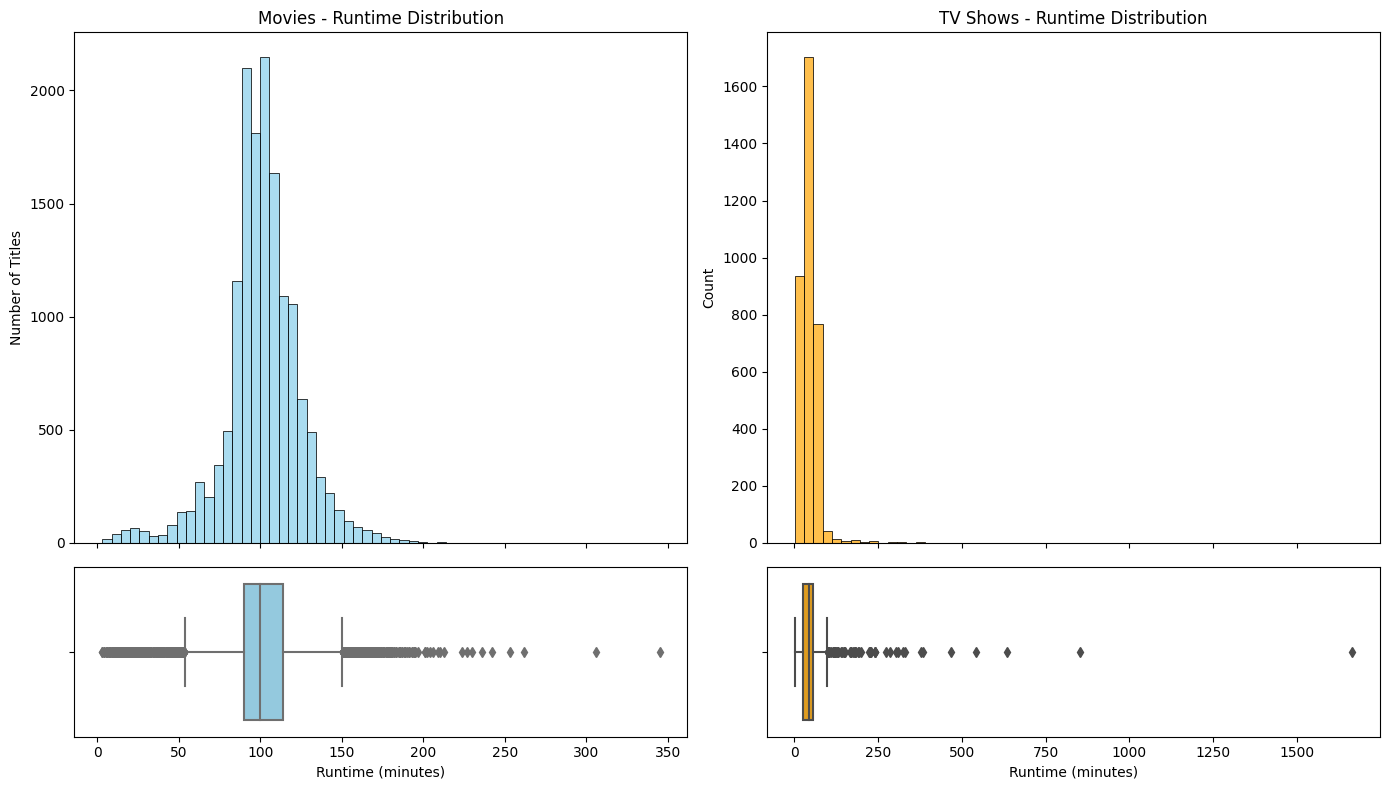

In [70]:
# Remove duplicates by imdbId to avoid double counting
df_unique = df_final.drop_duplicates(subset=['imdbId'])

# Separate runtimes by type
runtime_movies = df_unique[df_unique['type'] == 'movie']['runtimeMinutes'].dropna()
runtime_tv = df_unique[df_unique['type'] == 'tv']['runtimeMinutes'].dropna()

# Plot the result
fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex='col', gridspec_kw={'height_ratios': [3, 1]})

# Histogram for Movies
sns.histplot(runtime_movies, bins=60, color='skyblue', kde=False, ax=axs[0, 0], alpha=0.7)
axs[0, 0].set_title('Movies - Runtime Distribution')
axs[0, 0].set_ylabel('Number of Titles')

# Histogram for TV Shows
sns.histplot(runtime_tv, bins=60, color='orange', kde=False, ax=axs[0, 1], alpha=0.7)
axs[0, 1].set_title('TV Shows - Runtime Distribution')

# Boxplot for Movies
sns.boxplot(x=runtime_movies, ax=axs[1, 0], color='skyblue')
axs[1, 0].set_xlabel('Runtime (minutes)')
axs[1, 0].set_ylabel('')

# Boxplot for TV Shows
sns.boxplot(x=runtime_tv, ax=axs[1, 1], color='orange')
axs[1, 1].set_xlabel('Runtime (minutes)')
axs[1, 1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

> 📌 **Insights**
>
> - **Runtime Patterns:** Movies peak at 90-120 minutes, with a long tail reaching beyond 500 minutes. TV Shows peak at 20-60 minutes, with a narrower, more uniform distribution.
> - **Frequency & Volume:** Movies dominate longer runtime bins. TV Shows have more titles at their peak (\~1700), indicating high volume and consistency.
> - **Skewness & Outliers:** Movies show a right-skew with diverse runtimes and more outliers. TV Shows show a left-skew or symmetric pattern, reflecting standardized durations.
> - **Overlap Zone (60–90 minutes):** Likely includes long TV episodes, short films, or documentaries—creating slight runtime ambiguity between categories.

### Movie Duration Statistics: Mean vs Medians

In [71]:
# Calculate average movie duration
average_movie_duration = runtime_movies.mean()
print(f"Average movie duration: {average_movie_duration:.2f} minutes")

# Calculate median movie duration
median_movie_duration = runtime_movies.median()
print(f"Median movie duration: {median_movie_duration:.2f} minutes")

Average movie duration: 101.45 minutes
Median movie duration: 100.00 minutes


### TV Show Duration Statistics: Mean vs Median

In [72]:
# Calculate average duration of TV show
average_tv_duration = runtime_tv.mean()
print(f"Average duration of TV show: {average_tv_duration:.2f} minutes")

# Calculate median duration of TV show
median_tv_duration = runtime_tv.median()
print(f"Median duration of TV show: {median_tv_duration:.2f} minutes")

Average duration of TV show: 44.95 minutes
Median duration of TV show: 45.00 minutes


### Common Duration Patterns

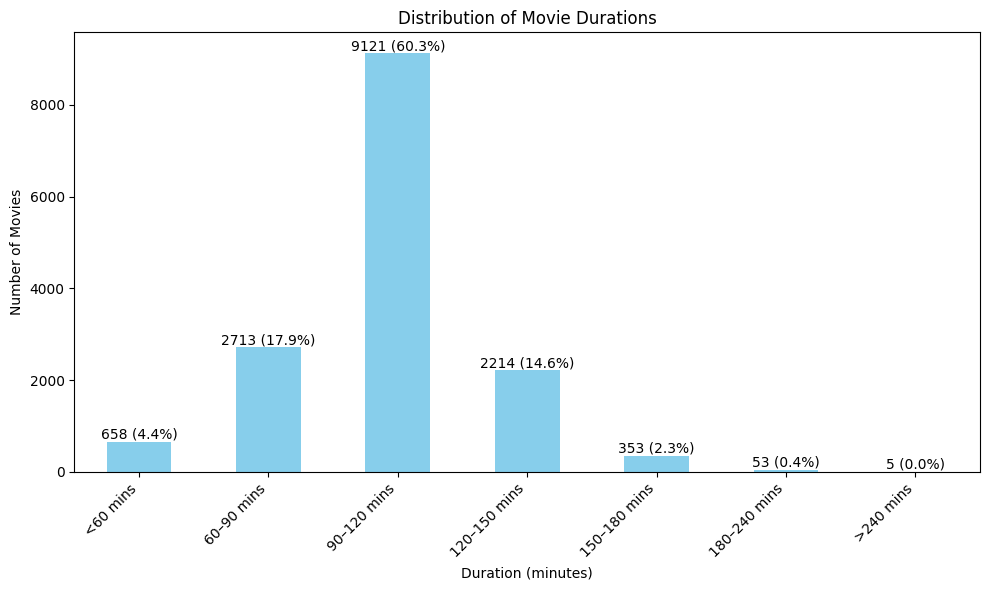

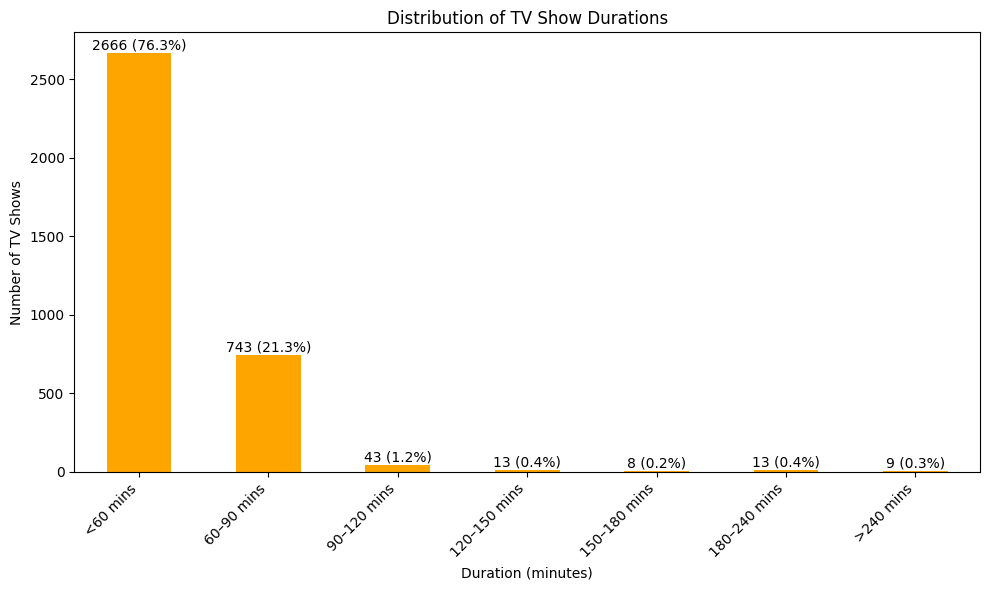

In [73]:
# Define duration bins
bins = [0, 60, 90, 120, 150, 180, 240, runtime_movies.max() + 10]
labels = ['<60 mins', '60–90 mins', '90–120 mins', '120–150 mins', '150–180 mins', '180–240 mins', '>240 mins']

# Classify runtimes to duration bins
binned_movie_durations = pd.cut(runtime_movies, bins=bins, labels=labels, right=False)
binned_tv_durations = pd.cut(runtime_tv, bins=bins, labels=labels, right=False)

# Count titles in each bin
duration_bin_counts_movie = binned_movie_durations.value_counts().sort_index()
duration_bin_counts_tv = binned_tv_durations.value_counts().sort_index()

# Plot distribution of movie durations
fig, ax = plt.subplots(figsize=(10, 6))
duration_bin_counts_movie.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Distribution of Movie Durations')
ax.set_xlabel('Duration (minutes)')
ax.set_ylabel('Number of Movies')
ax.set_xticklabels(labels, rotation=45, ha='right')
annotate_bars(ax, fmt='both')
plt.tight_layout()
plt.show()

# Plot distribution of TV show duration
fig, ax = plt.subplots(figsize=(10, 6))
duration_bin_counts_tv.plot(kind='bar', ax=ax, color='orange')
ax.set_title('Distribution of TV Show Durations')
ax.set_xlabel('Duration (minutes)')
ax.set_ylabel('Number of TV Shows')
ax.set_xticklabels(labels, rotation=45, ha='right')
annotate_bars(ax, fmt='both')
plt.tight_layout()
plt.show()

> 📌 **Insights**
>
> - **Movies** exhibit a broad, right-skewed runtime distribution, ranging from short films to extended features. The close values of average (\~101.5 mins) and median (100.0 mins) durations suggest a mostly symmetric spread, with some long-tail outliers. The 90–120 minute range dominates with 9,121 titles (~66%), aligning with the standard feature-length format. The 60–90 minute range follows with 2,713 titles, likely comprising shorter or lower-budget films. Only 658 titles are under 60 minutes, possibly due to limited representation or classification inconsistencies. Just 5 titles exceed 240 minutes, confirming that extremely long runtimes are rare.
> - **TV shows** display a highly standardized structure, with runtimes tightly clustered around the typical episodic length. The average duration is ~44.95 minutes, and the median is 45.0 minutes, indicating a symmetric and consistent distribution. A majority of 2,666 titles fall under 60 minutes. 743 titles are in the 60–90 minute range, while only 86 titles exceed 90 minutes—likely representing pilots, finales, or special episodes.

### Genre-Based Analysis of Movie Runtimes

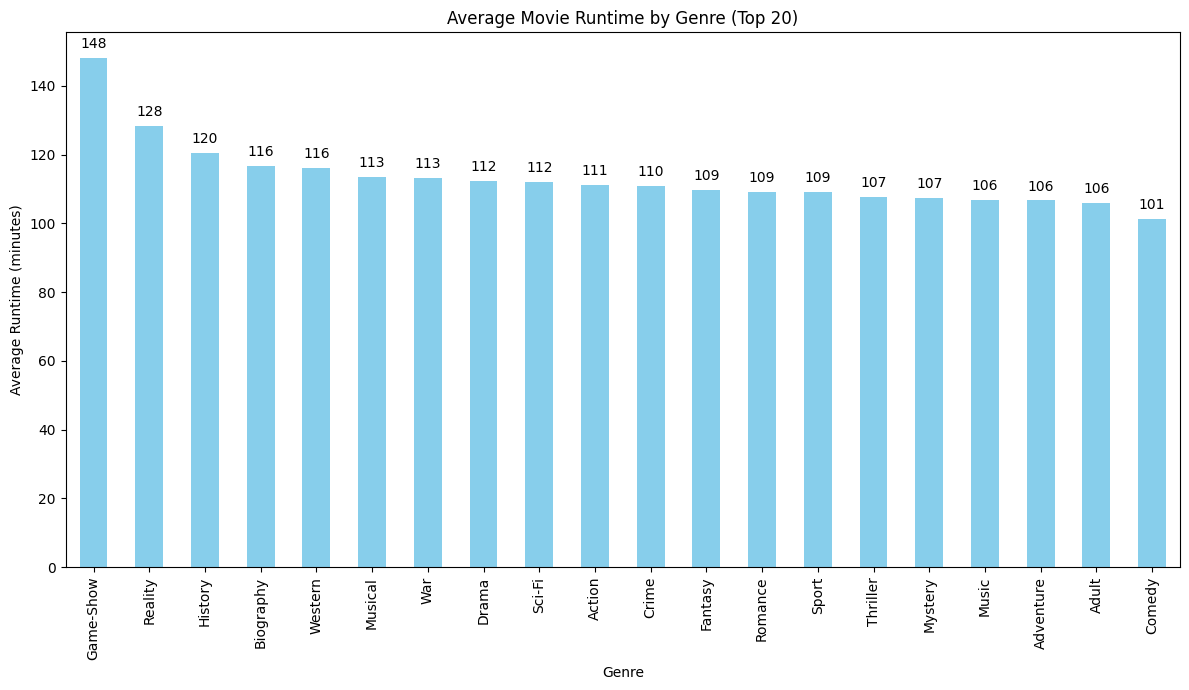

In [74]:
# Calculate the average runtime (in minutes) of movies for each genre
average_runtime_by_genre_movie = df_final[df_final['type'] == 'movie'] \
    .groupby('genre')['runtimeMinutes'].mean().round(2).sort_values(ascending=False)

# Plot the result (top 20)
fig, ax = plt.subplots(figsize=(12, 7))
average_runtime_by_genre_movie.head(20).plot(kind='bar')
ax.set_title('Average Movie Runtime by Genre (Top 20)')
ax.set_xlabel('Genre')
ax.set_ylabel('Average Runtime (minutes)')
ax.set_xticklabels(average_runtime_by_genre_movie.head(20).index, rotation=90)
annotate_bars(ax, fmt='count')
plt.tight_layout()
plt.show()

> 📌 **Insights**
>
> Game Shows (\~148 min) and Reality (\~128 min) have notably longer runtimes. History, Biography, Western, Musical, War, Drama, Sci-Fi, and Action mostly run between 110-120 minutes. Comedy (\~101 min) and similar genres tend to have shorter runtimes around 100-110 minutes. Most genres fall between 100 and 120 minutes, reflecting typical feature-length films.

### Genre-Based Analysis of TV Show Runtimes

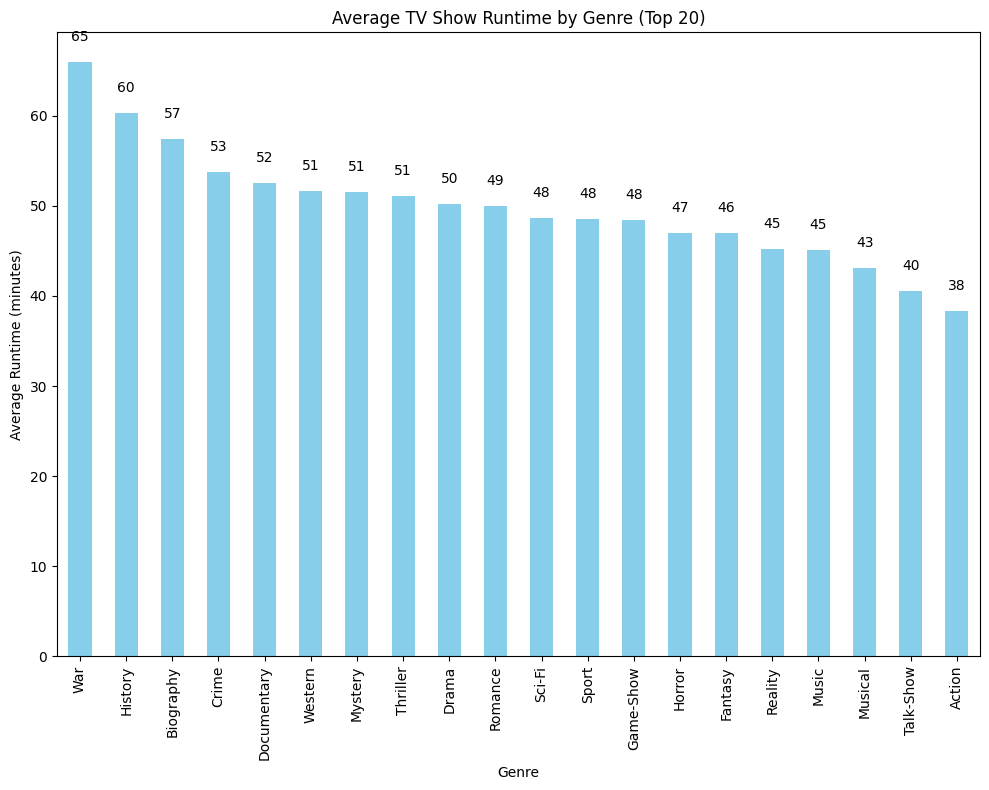

In [75]:
# Calculate the average runtime (in minutes) of tv show for each genre
average_runtime_by_genre_tv = df_final[df_final['type'] == 'tv'] \
    .groupby('genre')['runtimeMinutes'].mean().round(2).sort_values(ascending=False)

# Plot the result
fig, ax = plt.subplots(figsize=(10, 8))
average_runtime_by_genre_tv.head(20).plot(kind='bar')
ax.set_title('Average TV Show Runtime by Genre (Top 20)')
ax.set_xlabel('Genre')
ax.set_ylabel('Average Runtime (minutes)')
ax.set_xticklabels(average_runtime_by_genre_tv.head(20).index, rotation=90)
annotate_bars(ax, fmt='count')
plt.tight_layout()
plt.show()

> 📌 **Insights**
>
> The longest episodes are typically found in the War genre (\~66 mins), followed by History (60 mins) and Biography (57.5 mins). Most genres generally have episodes that range from 40 to 55 minutes in length. On the shorter end, Action episodes average 38 minutes, while Talk-Show and Musical genres have episodes averaging 40.5 and 43 minutes, respectively.

### Analysis of Runtime Duration Trends by Country (Top 20)

**Average Runtime of Movies by Country**

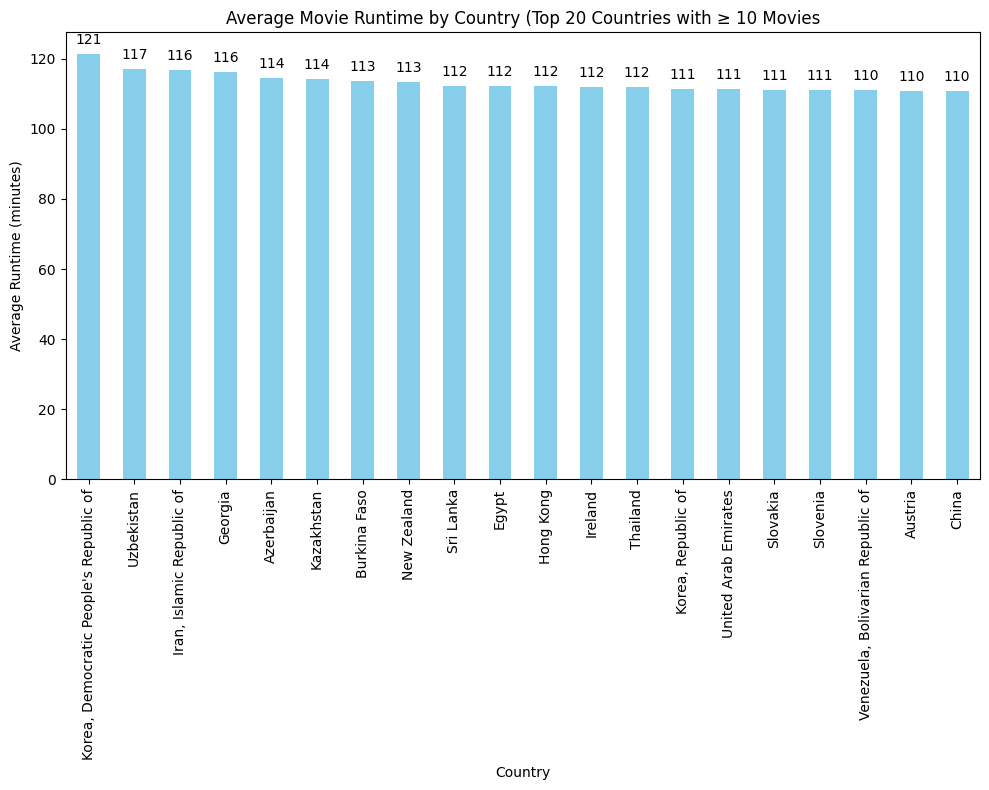

In [76]:
# Calculate the average runtime of movies grouped by country
average_runtime_by_country_movie = df_final[df_final['type'] == 'movie'] \
    .groupby('country')['runtimeMinutes'].mean().round(2)

# Filter out countries with low movie count
country_movie_counts = df_final[df_final['type'] == 'movie']['country'].value_counts()
countries_with_enough_movies = country_movie_counts[country_movie_counts >= 10].index

# Apply the filter
average_runtime_by_country_movie_filtered = average_runtime_by_country_movie.loc[countries_with_enough_movies]

# Sort descending by runtime after filtering
average_runtime_by_country_movie_filtered = average_runtime_by_country_movie_filtered.sort_values(ascending=False)

# Plot the result
fig, ax = plt.subplots(figsize=(10, 8))
average_runtime_by_country_movie_filtered.head(20).plot(kind='bar')
ax.set_title('Average Movie Runtime by Country (Top 20 Countries with ≥ 10 Movies')
ax.set_xlabel('Country')
ax.set_ylabel('Average Runtime (minutes)')
ax.set_xticklabels(average_runtime_by_country_movie_filtered.head(20).index, rotation=90)
annotate_bars(ax, fmt='count')
plt.tight_layout()
plt.show()

> 📌 **Insights**
>
> North Korea leads with the highest average movie runtime of 121.5 mins, followed by Uzbekistan (117.2 mins) and Iran (116.8 mins). Countries like Georgia, Azerbaijan, Kazakhstan, Egypt, Sri Lanka, and Hong Kong consistently produce longer films (average range (110-116 mins). A significant number of countries, including China, Austria, Venezuela, and UAE, have average runtimes above 110 minutes, indicating a storytelling style favoring extended narratives.

**Average Runtime of TV Shows by Country**

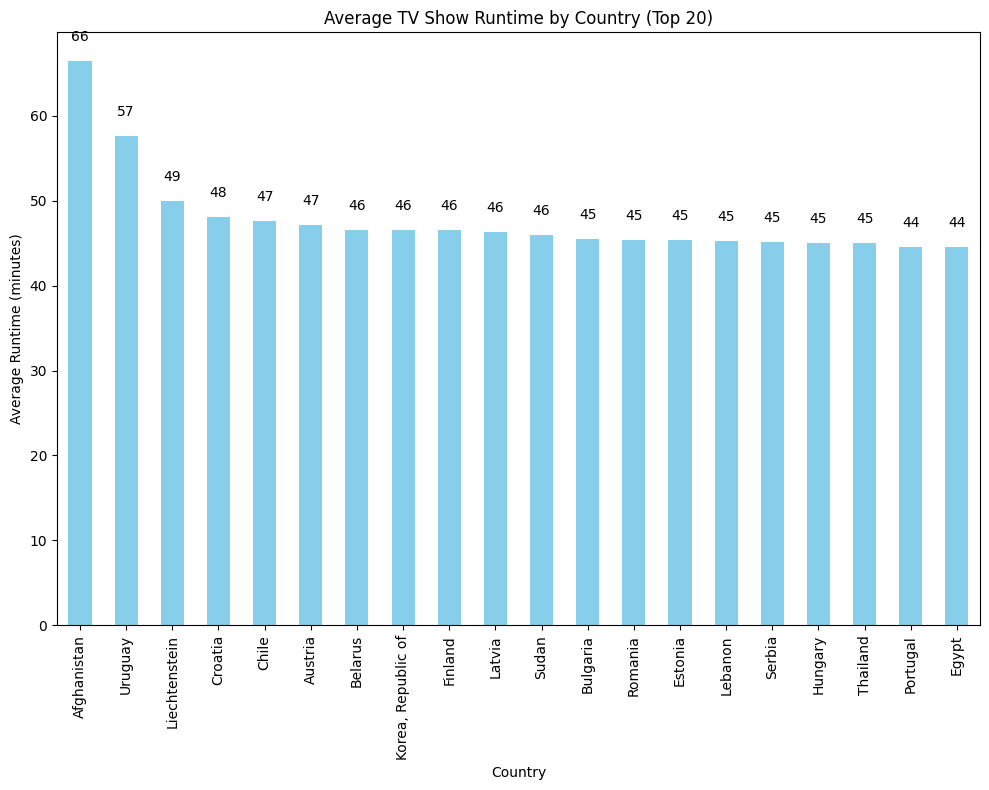

In [77]:
# Calculate the average runtime of TV shows grouped by country
average_runtime_by_country_tv = df_final[df_final['type'] == 'tv'] \
    .groupby('country')['runtimeMinutes'].mean().round(2)

# Sort descending by runtime
average_runtime_by_country_tv_sorted = average_runtime_by_country_tv.sort_values(ascending=False)

# Plot the average TV show runtime by country (Top 20)
fig, ax = plt.subplots(figsize=(10, 8))
average_runtime_by_country_tv_sorted.head(20).plot(kind='bar')

ax.set_title('Average TV Show Runtime by Country (Top 20)')
ax.set_xlabel('Country')
ax.set_ylabel('Average Runtime (minutes)')
ax.set_xticklabels(average_runtime_by_country_tv_sorted.head(20).index, rotation=90)

annotate_bars(ax, fmt='count')
plt.tight_layout()
plt.show()

> 📌 **Insights**
>
> Afghanistan stands out with an average of 66.5 minutes per TV show, well above global norms. Countries like Uruguay, Liechtenstein, Croatia, and Austria typically produce shows averaging 47-58 mins, suggesting emphasis on longer episode formats. Nations like Portugal, Egypt, Thailand, Hungary, and Lebanon tend to produce shorter, possibly more episodic content in the 44–46 min range.


## Title-Level Insights & Keyword Patterns




### Overall Top-Rated Titles

In [78]:
# Function to get top N titles
def get_top_titles(dataframe, group_col, top_n=5):
    if group_col:
        print(f"\n===Top {top_n} rated titles per {group_col}===\n")
        # Group by the specified column and get the top N titles within each group
        top_titles = dataframe.sort_values(by='imdbAverageRating', ascending=False).groupby(group_col).head(top_n)
        return top_titles.sort_values(by=[group_col, 'imdbAverageRating'], ascending=[True, False])
    else:
        print(f"===Overall Top {top_n} Rated Titles===\n")
        # Just get the overall top N titles
        return dataframe.sort_values(by='imdbAverageRating', ascending=False).head(top_n)


# Ensure imdbAverageRating is numeric and handle potential NaNs
df_final['imdbAverageRating'] = pd.to_numeric(df_final['imdbAverageRating'], errors='coerce')

# Drop rows with rating missing
df_rated = df_final.dropna(subset=['imdbAverageRating']).copy()

# Filter out titles with very few votes
vote_threshold = 1000 # Adjust threshold as needed
df_rated = df_rated[df_rated['imdbNumVotes'] >= vote_threshold]

# Show top rated titles overall
top_overall = get_top_titles(df_rated.drop_duplicates(subset=['imdbId']), group_col=None, top_n=10)
top_overall[['title', 'type', 'releaseYear', 'imdbAverageRating', 'imdbNumVotes']]

===Overall Top 10 Rated Titles===



,title,type,releaseYear,imdbAverageRating,imdbNumVotes
287453,Breaking Bad,tv,2008,9.5,2333239
289689,Band of Brothers,tv,2001,9.4,562235
286527,Avatar: The Last Airbender,tv,2005,9.3,406507
4130,The Shawshank Redemption,movie,1994,9.3,3045964
318314,Our Planet,tv,2019,9.2,56797
3663,The Godfather,movie,1972,9.2,2126365
354230,When Life Gives You Tangerines,tv,2025,9.2,18223
286231,One Piece Fan Letter,movie,2024,9.2,19914
298434,The Chosen,tv,2017,9.1,58200
293045,Running Man,tv,2010,9.1,3884


### Top-Rated Titles by Year (Last 10 Years)

In [79]:
# Show Top Rated Titles Per Year (Last 10 years) ---
print("\n===Top Rated Titles Per Year (Last 10 Years)===\n")
latest_year = df_rated['releaseYear'].max()
recent_years_df = df_rated[df_rated['releaseYear'] >= latest_year - 9].drop_duplicates(subset=['imdbId'])

# Filter years that actually exist in the filtered data
recent_years_list = sorted(recent_years_df['releaseYear'].dropna().unique())

if not recent_years_list:
    print("No data for recent years available after filtering.")
else:
    top_per_year = recent_years_df.groupby('releaseYear', group_keys=False).apply(lambda x: x.nlargest(5, 'imdbAverageRating'))
    print(top_per_year[['title', 'type', 'releaseYear', 'imdbAverageRating', 'imdbNumVotes']].sort_values(by=['releaseYear', 'imdbAverageRating'], ascending=[False, False]))


===Top Rated Titles Per Year (Last 10 Years)===

                                           title   type  releaseYear  \
354230            When Life Gives You Tangerines     tv         2025   
353471           The Trauma Code: Heroes on Call     tv         2025   
360417                           The First Frost     tv         2025   
360282                               Adolescence     tv         2025   
335805           Asterix & Obelix: The Big Fight     tv         2025   
286231                      One Piece Fan Letter  movie         2024   
296963                      Love in the Big City     tv         2024   
80154                             Dune: Part Two  movie         2024   
298038                       Culinary Class Wars     tv         2024   
221445                               Meiyazhagan  movie         2024   
348862                                My Dearest     tv         2023   
350248             Frieren: Beyond Journey's End     tv         2023   
355583        

### Top-Rated Titles by Country (Top 10 Countries)

In [80]:
# Show Top Rated Titles Per Country (Top 10 Countries by Content Count) ---
print("\n===Top Rated Titles Per Country (Top 10 Countries by Titles)===\n")

# Get top 10 countries by number of titles available
top_countries = df_rated.drop_duplicates(subset=['imdbId', 'country'])['country'].value_counts().head(10).index.tolist()

if not top_countries:
     print("No countries found with enough rated titles.")
else:
    # Filter DataFrame to include only these top countries
    df_top_countries = df_rated[df_rated['country'].isin(top_countries)].drop_duplicates(subset=['imdbId', 'country']).copy()

    # Group by country and get top titles within each
    top_per_country = df_top_countries.groupby('country', group_keys=False).apply(lambda x: x.nlargest(3, 'imdbAverageRating')) # Get top 3 per country

    print(top_per_country[['country','title', 'type',  'releaseYear', 'imdbAverageRating', 'imdbNumVotes']].sort_values(by=['country', 'imdbAverageRating'], ascending=[True, False]))


===Top Rated Titles Per Country (Top 10 Countries by Titles)===

                   country                     title   type  releaseYear  \
287473           Australia              Breaking Bad     tv         2008   
289709           Australia          Band of Brothers     tv         2001   
4149             Australia  The Shawshank Redemption  movie         1994   
287480              Brazil              Breaking Bad     tv         2008   
289713              Brazil          Band of Brothers     tv         2001   
4181                Brazil  The Shawshank Redemption  movie         1994   
287499              Canada              Breaking Bad     tv         2008   
289699              Canada          Band of Brothers     tv         2001   
4152                Canada  The Shawshank Redemption  movie         1994   
287455              France              Breaking Bad     tv         2008   
289701              France          Band of Brothers     tv         2001   
4166                Fr

### Top-Rated Titles by IMDb Rating Categories

In [81]:
# Define rating bins
rating_bins = [1.0, 6.0, 7.0, 8.0, 9.0, 10.1]

# Create labels for the bins
rating_labels = ['1.0-5.9', '6.0-6.9', '7.0-7.9', '8.0-8.9', '9.0-10.0']
df_rated['rating_category'] = pd.cut(df_rated['imdbAverageRating'], bins=rating_bins, labels=rating_labels, right=False, include_lowest=True)

print("\n===Top Rated Titles Per IMDb Rating Category===\n")

# Filter out categories with very few titles if needed
rating_category_counts = df_rated['rating_category'].value_counts()
categories_to_include = rating_category_counts[rating_category_counts > 10].index # Include categories with at least 10 titles

df_rated_filtered_cats = df_rated[df_rated['rating_category'].isin(categories_to_include)].drop_duplicates(subset=['imdbId']).copy()

if not categories_to_include.empty:
    top_per_rating_category = df_rated_filtered_cats.groupby('rating_category', group_keys=False).apply(lambda x: x.nlargest(5, 'imdbAverageRating')) # Get top 5 per category
    print(top_per_rating_category[['title', 'type', 'rating_category', 'releaseYear', 'imdbAverageRating', 'imdbNumVotes']].sort_values(by=['rating_category', 'imdbAverageRating'], ascending=[True, False]))
else:
    print("No rating categories found with enough rated titles.")


===Top Rated Titles Per IMDb Rating Category===

                                                    title   type  \
4780                                    Jurassic Park III  movie   
7442                                     2 Fast 2 Furious  movie   
9010                                               Saw IV  movie   
15528                                              Hostel  movie   
21397                                          88 Minutes  movie   
2688                                              48 Hrs.  movie   
3568                                              Syriana  movie   
4350                                     Ocean's Thirteen  movie   
5298                                     Summer in Berlin  movie   
5757                                 My Own Private Idaho  movie   
472                                           Talk to Her  movie   
901                                                  Hero  movie   
2584                       Crouching Tiger, Hidden Dragon  movie  

### Common Keywords and Themes in Popular Titles

In [82]:
# Define thresholds to identify 'popular' titles based on IMDb rating and number of votes
rating_threshold = 7.5
vote_threshold = 10000

# Filter dataset to retain only popular titles that meet both rating and vote criteria
df_popular = df_final[
    (df_final['imdbAverageRating'] >= rating_threshold) &
    (df_final['imdbNumVotes'] >= vote_threshold)
].drop_duplicates(subset=['imdbId']).copy()  # Remove duplicates to keep only unique titles

# Check if any popular titles meet the criteria
if df_popular.empty:
    print("No popular titles found based on the current rating and vote thresholds.")
else:
    print(f"Analyzing keywords in {len(df_popular)} popular titles (Rating ≥ {rating_threshold}, Votes ≥ {vote_threshold})...\n")

    # Convert titles to lowercase strings and handle missing values
    df_popular['title_lower'] = df_popular['title'].astype(str).fillna('').str.lower()

    # Combine all titles into a single text blob for word frequency analysis
    all_popular_titles_text = ' '.join(df_popular['title_lower'])

    # Extract all words using regular expression (simple tokenization)
    all_words = re.findall(r'\b\w+\b', all_popular_titles_text)

    # Define a basic list of common stopwords and filter them out along with short words
    stop_words = set([
        'the', 'a', 'an', 'of', 'in', 'for', 'and', 'with', 'on', 'is', 'it', 'to', 'by', 'at', 'from', 'or', 'as',
        'but', 'this', 'that', 'its', 'his', 'her', 'out', 'up', 'down', 'back', 'when', 'what', 'how', 'where',
        'which', 'who', 'whom', 'why', 'just', 'about', 'all', 'any', 'both', 'each', 'few', 'more', 'most',
        'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
        's', 't', 'can', 'will', 'would', 'don', 'should', 'now'
    ])

    cleaned_words = [word for word in all_words if len(word) > 2 and word not in stop_words]

    # Count frequency of cleaned words
    word_counts = Counter(cleaned_words)

    # Show the top 30 most frequent keywords in popular titles
    print("\n===Top 30 most frequent words/keywords in popular titles (excluding common words)===\n")
    for word, count in word_counts.most_common(30):
        print(f"'{word}': {count}")

    # Analyze presence of specific thematic keywords in popular titles
    theme_keywords = ['love', 'war', 'mystery', 'christmas', 'holiday', 'secret',
                      'story', 'life', 'world', 'time', 'day', 'night', 'home',
                      'road', 'man', 'woman', 'girl', 'boy']

    print("\nAnalyzing specific theme keywords in popular titles:")

    for keyword in theme_keywords:
        count = df_popular['title_lower'].str.contains(r'\b' + re.escape(keyword) + r'\b', case=False).sum()
        if count > 0:
            print(f"Count of popular titles containing '{keyword}': {count}")

Analyzing keywords in 1305 popular titles (Rating ≥ 7.5, Votes ≥ 10000)...


===Top 30 most frequent words/keywords in popular titles (excluding common words)===

'man': 23
'one': 16
'life': 16
'love': 15
'dragon': 13
'dead': 12
'world': 12
'you': 10
'american': 9
'last': 9
'part': 9
'blood': 9
'black': 9
'your': 9
'blue': 9
'star': 9
'show': 8
'day': 7
'night': 7
'inside': 7
'queen': 7
'harry': 7
'potter': 7
'game': 7
'trek': 7
'ball': 7
'hero': 6
'dark': 6
'time': 6
'spider': 6

Analyzing specific theme keywords in popular titles:
Count of popular titles containing 'love': 15
Count of popular titles containing 'war': 5
Count of popular titles containing 'mystery': 2
Count of popular titles containing 'christmas': 1
Count of popular titles containing 'holiday': 1
Count of popular titles containing 'secret': 5
Count of popular titles containing 'story': 6
Count of popular titles containing 'life': 16
Count of popular titles containing 'world': 12
Count of popular titles containing 'tim

# Key Insights from Netflix Content Dataset

## Theme-based Findings

| **Theme**               | **Findings**                                                                                                  |
| ----------------------- | ------------------------------------------------------------------------------------------------------------- |
| **Ratings**             | Most titles rated between 6.0–7.9 (“Good”). No perfect 10s; extremes are rare.                                |
| **Genres & Categories** | Drama and Comedy dominate the catalog, followed by Crime and Thriller. Genres like Kids, Adult, Film-Noir, and News are nearly absent. Movies still outnumber TV shows but the gap is narrowing. |
| **Geographic Reach**    | Non-U.S. content dominates. Europe leads in movie output; Asia also strong.                                   |
| **Languages**           | High multilinguality in top-producing countries. Notable non-Latin script usage.                              |
| **Runtimes**            | Standard TV length (\~45 mins). Movie runtimes vary by genre/country (90–120 mins norm).                      |
| **Availability**        | Most titles span 2–50 countries. Truly global titles are rare; family animation often leads.                  |
| **Temporal Trends**     | Surge post-2017 (streaming boom), peak in 2022, dip post-2023. TV overtakes movies in 2025.                   |


### Ratings Distribution
* Content ratings cluster in the "Good" range (6.0–7.9), suggesting either audience conservatism or platform curation.
* Very few titles are rated ≤3.9 or ≥8.0. No perfect 10 ratings were recorded.
* This mid-range dominance could limit the granularity of recommendation systems.

### Genre, Format & Catalog Insights

- **Genre Dominance:** Drama leads the catalog by a wide margin, followed by Comedy, Crime, and Thriller. These four genres make up the core of the content offering.
- **Genre Gaps:** Kids, Adult, Film-Noir, and News genres are virtually absent. Other underrepresented categories include Talk-Show, Short, and Action, each with fewer than 50 titles.
- **Format Skew:** Movies outnumber TV shows by approximately 4:1, although this gap has been steadily narrowing over time.
- **2025 Trend:** For the first time, TV titles surpass movie titles — signaling a strategic shift toward episodic or serialized formats.

### Geographic & Language Diversity

* **Non-U.S. Leadership**: Non-U.S. titles lead in both volume and distribution.
* **Regional Highlights**: Europe tops movie production; Asia contributes significantly as well.
* **Language Reach**: Top countries often show >2x the multilingual title appearances vs. unique titles.
* **Non-Latin Scripts**: Countries like Russia, Armenia, and France show significant local-language engagement.

### Runtime Patterns

* **TV**: Standard episodes \~45 minutes.
* **Movies**: Typically 90–120 minutes.
* **Regional Deviations**: E.g., North Korea’s films average 121.5 mins; Afghanistan’s shows average 66.5 mins.
* **Runtime as a Signature**: Genre and geography shape runtime expectations—useful for segmentation.

### Content Volume Over Time

* **Post-2017 Boom**: Significant rise in content coinciding with the global streaming surge.
* **Pandemic Dip**: Production slowed in 2020–2021.
* **2022 Peak**: Highest output year across both formats.
* **Recent Plateau**: Slight decline post-2023 may indicate market saturation.

### Emerging Trends & Strategic Observations
* **TV Ascendance**: In 2025, TV show volume overtakes movies—potentially due to content strategy shifts or incomplete data.
* **Global Animation Appeal**: Family-friendly animated content has the widest global reach.
* **Runtime as a Cultural Marker**: High runtimes in countries like Uzbekistan, North Korea may reflect storytelling norms or regulatory influence.
* **U.S. vs. Global**: Despite Netflix’s U.S. base, global content dominates in production and distribution.

# Recommendations
- **Content Strategy:** To strengthen content offerings, the focus should be on genre diversification by investing in underrepresented categories such as War, Mystery, Kids, and Musical—filling key market gaps. Additionally, optimizing runtime strategy is crucial. Shorter, fast-paced genres like Action and Comedy are ideal for mobile-first and emerging markets, making them a smart match for platforms targeting high-consumption, low-duration viewing habits.
- **Globalization and Localization:** Expanding original production through regional studios in Europe, Asia, and Latin America will help build locally relevant content at scale. Simultaneously, improving language support—including non-Latin scripts and robust subtitle/audio localization—will enhance accessibility and appeal in linguistically diverse regions.
- **Distribution Optimization:** Successful regional hits, particularly those available in over 20 countries, should be strategically scaled to broader international markets. Animation and family-friendly content remain strong candidates for global distribution due to their universal, cross-cultural appeal.
- **User Experience & Ratings:** Boosting engagement with user ratings can help break the common mid-tier rating cluster and improve personalization algorithms. Tailoring the user interface to reflect individual preferences—such as favored rating ranges and typical runtimes—will further enhance the content discovery experience.
- **Advanced Modelling:** Implement collaborative filtering using rating tiers, genre, runtime, and language to refine personalization. Leverage multilingual title embeddings for better cross-language discovery. Use churn prediction to flag users exposed to repetitive or mid-tier content. Combine availability and rating data to identify titles suited for wider rollout or localized campaigns. Apply predictive modeling to forecast content success, and prototype an AI-driven title generator based on high-performing naming patterns.


> 📣 **Help Me Improve**
>
> Your feedback is always welcome and appreciated! If you spot any issues, have ideas, or just want to share your thoughts, feel free to reach out.
>
> Thanks for your patience and support!

---
© 2025 Saurabh Kudesia

*This project is licensed under the [MIT License](https://opensource.org/licenses/MIT). You are free to use, modify, and distribute this code, provided you include proper attribution and retain the license notice.* 

[![License: MIT](https://img.shields.io/badge/License-MIT-blue.svg)](https://opensource.org/licenses/MIT)